In [581]:
import numpy as np

import math

import random

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from itertools import combinations

from scipy.stats import ttest_ind

from scipy.stats import spearmanr

from scipy.stats import chi2_contingency

from scipy.stats import kendalltau

from scipy.stats import rankdata

import os

from collections import Counter

import types
import numbers
import decimal

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # выведем больше строк

pd.set_option('display.max_columns', 50) # выведем больше колонок

print(os.listdir("../input"))
#https://www.pordata.pt/en/DB/Portugal/Search+Environment/Table
#https://realpython.com/numpy-scipy-pandas-correlation-python/#spearman-correlation-coefficient
#https://www.machinelearningmastery.ru/how-to-calculate-nonparametric-rank-correlation-in-python/
#https://www.statisticssolutions.com/table-of-critical-values-pearson-correlation/
#https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

['imbd-sf', 'UNICEF_stud_math']


#  Глобальные переменные и функции

In [582]:

df = pd.read_csv('../input/UNICEF_stud_math/stud_math.csv')
df_src = df.copy()
#Глобальные переменные для передачи в df.apply
targetFeature = '' #целевая колонка df, например 'romantic'
filterQuery = '' # условия поиска "похожих" сторк, например '(  ( 45 <= score <= 60) & (age ==15 ) & (higher == 1) & (sex == 0) ) '
N_features ='all' #количество возвращаемых корреляционных коэфф-в "all" - все значимые, 1/2/3/4 - к-во
func ='mostfreq' #функция обработки filterQuery  'mostfreq'/'mean'/'median'


In [583]:
def changeVal(columnsList, oldVal1, newVal1, oldVal2, newVal2):

    for col in columnsList:
        df[col] = df[col].apply(lambda x: newVal1 if str(x).strip() == oldVal1 and str(x).strip() != oldVal2 else newVal2 if str(x).strip() == oldVal2 and x.strip() != oldVal1 else x)

In [584]:
pd.Series(rankdata(df.Medu,method='average')).value_counts()

327.0    131
113.5    102
213.0     97
33.0      59
2.0        3
395.0      1
393.0      1
394.0      1
dtype: int64

In [585]:
pd.Series(rankdata(df.score,method='dense')).value_counts()

8     54
9     46
1     37
13    33
6     31
10    31
11    31
7     27
12    27
14    16
4     15
16    12
5      9
3      7
15     6
17     5
23     1
18     1
19     1
20     1
21     1
22     1
2      1
24     1
dtype: int64

In [586]:
df.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

In [587]:
df[(df.Medu != 1) &(df.Medu != 2) &(df.Medu != 3) &(df.Medu != 4)& (df.Medu != 5)& (np.isnan(df.Medu))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


In [588]:
display(spearmanr(df.Medu, df.score, nan_policy='omit' ))
display(spearmanr(rankdata(df.Medu), df.score, nan_policy='omit' ))
display(spearmanr(rankdata(df.Medu), rankdata(df.score), nan_policy='omit' ))
display(spearmanr(df.Medu, rankdata(df.score), nan_policy='omit' ))

SpearmanrResult(correlation=0.2202410095990063, pvalue=1.2610874332199951e-05)

SpearmanrResult(correlation=0.20121901209007548, pvalue=6.419312760528024e-05)

SpearmanrResult(correlation=0.16853228625693442, pvalue=0.0007710495457891147)

SpearmanrResult(correlation=0.1866925599245159, pvalue=0.00020140075916278124)

In [589]:
display(spearmanr(df.address, rankdata(df.score), nan_policy='omit' ))
display(spearmanr(rankdata(df.address), rankdata(df.score), nan_policy='omit' ))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [590]:
changeVal(['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher','internet',	'romantic'],'yes',1,'no',0)
changeVal(['famsize'],'LE3',0,'GT3',1)
changeVal(['Pstatus'],'T',1,'A',0)
changeVal(['address'],'U',1,'R',0)
changeVal(['school'],'GP',1,'MS',0)
changeVal(['sex'],'F',0,'M',1)

In [591]:
def get_boxplot4Val(column):
    try:
        fig, ax = plt.subplots(figsize = (8, 2))
        df.boxplot(column)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()
    except:
        return

In [592]:
def get_his4Val(column, df1=df):
    try:
        fig, ax = plt.subplots(figsize = (14, 4))
        df1[column].hist()
        plt.xticks(rotation=45)
        ax.set_title('Hist for ' + column)
        plt.show()
    except:
        return

In [593]:
def get_his4ValDf(column, df1=df):
    try:
        fig, ax = plt.subplots(figsize = (14, 4))
        df1.hist()
        plt.xticks(rotation=45)
        ax.set_title('Hist for ' + column)
        plt.show()
    except:
        return

In [594]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df,#.loc[cacao.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [595]:
def get_histplot(column, y='score'):
    #fig, ax = plt.subplots(figsize = (14, 4))
    sns.jointplot(x=column, y=y,data=df, kind='reg') 
    # plt.xticks(rotation=45)
    #ax.set_title('Boxplot for ' + column)
    plt.show()

In [596]:
def get_barplot(column, hue, y='score', func=np.median):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.barplot(y=y, x=column, hue=hue, data=df, estimator=func, ax=ax)

    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + 'column')
    plt.show()

In [597]:
def get_stat_dif(column): 
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    pvl=[]
    for comb in combinations_all:
        pvalue = ttest_ind(  df.loc[df.loc[:, column] == comb[0], 'score'], df.loc[df.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue
        pvl.append(pvalue)
        if pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
    #print(pvl, '---', len(combinations_all))

In [598]:
#Нулевая гипотеза H_0: Выборки x и y не коррелируют (\rho = 0).
#если \rho больше табличного значения критерия Спирмена p[1] с уровнем значимости \alpha/2, то нулевая гипотеза отвергается
#https://statpsy.ru/correlation/tablica-correlations/
display(spearmanr(df.Medu, df.score, nan_policy='omit' ))
#
display(kendalltau(df.Medu, df.score, nan_policy='omit' ))

SpearmanrResult(correlation=0.2202410095990063, pvalue=1.2610874332199951e-05)

KendalltauResult(correlation=0.17124752703348148, pvalue=1.5817883030538723e-05)

In [599]:
display(spearmanr(df.Medu, df.score, nan_policy='omit' ))
display(spearmanr(rankdata(df.Medu), df.score, nan_policy='omit' ))
display(spearmanr(rankdata(df.Medu), rankdata(df.score), nan_policy='omit' ))
display(spearmanr(df.Medu, rankdata(df.score), nan_policy='omit' ))

SpearmanrResult(correlation=0.2202410095990063, pvalue=1.2610874332199951e-05)

SpearmanrResult(correlation=0.20121901209007548, pvalue=6.419312760528024e-05)

SpearmanrResult(correlation=0.16853228625693442, pvalue=0.0007710495457891147)

SpearmanrResult(correlation=0.1866925599245159, pvalue=0.00020140075916278124)

In [600]:
display(spearmanr(df.address, rankdata(df.score), nan_policy='omit' ))
display(spearmanr(rankdata(df.address), rankdata(df.score), nan_policy='omit' ))

SpearmanrResult(correlation=0.1410812738194649, pvalue=0.006003239662657006)

SpearmanrResult(correlation=0.16248522027077164, pvalue=0.0011925469674219525)

In [601]:
display(kendalltau(df.Medu, df.score, nan_policy='omit' ))
display(kendalltau(rankdata(df.Medu), df.score, nan_policy='omit' ))
display(kendalltau(rankdata(df.Medu), rankdata(df.score), nan_policy='omit' ))
display(kendalltau(df.Medu, rankdata(df.score), nan_policy='omit' ))

KendalltauResult(correlation=0.17124752703348148, pvalue=1.5817883030538723e-05)

KendalltauResult(correlation=0.15659667768539046, pvalue=7.184780539606609e-05)

KendalltauResult(correlation=0.13120460233770975, pvalue=0.0007862573126595238)

KendalltauResult(correlation=0.14524428146154342, pvalue=0.00021881284728800953)

In [602]:
for col in [	'Fjob',	'reason',	'guardian',	'traveltime',	'studytime',	'failures',	'schoolsup',	'famsup',	'paid',	'activities',	'nursery',	'higher',	'internet',	'romantic',	'famrel', 'freetime',	'goout',	'health','Mjob',	'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки Mjob


In [603]:
def isNaN_OK(targetFeature):
    if len(df[pd.isna(df[targetFeature])].index) == 0 :
         print(f'Все NaN в "{targetFeature}" успешно заменены.')
         return True
    else:
        print(f'НЕ Все NaN в "{targetFeature}" успешно заменены, осталось {len(df[pd.isna(df[targetFeature])].index)} из {len(df[targetFeature].index)}')
        return False

In [604]:
def getMainStatistics(column, returnTuple = False, df1=df):
    '''
    Возвращаем:
    perc25 - 1.5*IQR, perc25, IQR, perc75, perc75 + 1.5*IQR, median, mean, minCol, maxCol
    '''
    median = df1[column].median()
    mean = df1[column].mean()
    minCol = df1[column].min()
    maxCol = df1[column].max()
    perc25 = df1[column].quantile(0.25)
    perc75 = df1[column].quantile(0.75)
    IQR = perc75 - perc25

    if returnTuple:
        return perc25 - 1.5*IQR, perc25, IQR, perc75, perc75 + 1.5*IQR, median, mean, minCol, maxCol
    else:
        print(f'--{column}--  perc25 - 1.5*IQR={perc25 - 1.5*IQR}; perc25={perc25}; IQR={IQR}; perc75={perc75}; perc75 + 1.5*IQR ={perc75 + 1.5*IQR}; median={median}; mean={mean}; min={minCol}; max={maxCol}')
        

In [605]:
def getCorrelationFeatures(col, N_features='all', df1=df):
    #print("N_features ", N_features)
    if df1[col].dtypes == 'O':
        return None
    r_limit = np.round(2/(np.sqrt(len(df1.index))),2)

    r = round(df1.corr(method='kendall'),2) #spearman

    if N_features=='all':
        N_features = len(r)
    else:
        N_features+=1

    r_ser=(r[ (( r > 0)&(r >= r_limit)) | (( r < 0)&(r <= -r_limit))][col].dropna())#.index
    r_ser=r_ser.reindex(r_ser.abs().sort_values(ascending = False).index)[:N_features]
    #r_NamesList=r_ser.index#[:N_features]

    return r_ser

In [606]:
#test
getCorrelationFeatures(col='school')

school        1.00
age          -0.34
address       0.29
traveltime   -0.27
famsup        0.19
schoolsup     0.14
Medu          0.12
nursery       0.11
activities    0.11
internet      0.10
Name: school, dtype: float64

In [607]:
def calcStrFeature(groupbyList, filterQuery, targetFeature, func='mean', silent=False):
    
    res=np.NaN
    grouped_df=df.groupby(groupbyList)['age'].count().to_frame(name="count").reset_index().query(filterQuery)
    rowsCount = 0
    occurences = 0
    if (len(grouped_df.index) > 0):
        rowsCount = len(grouped_df.index)
        if func == 'mean':
            ggdf=grouped_df.dropna(subset=[targetFeature]).groupby(targetFeature).mean().reset_index()
            # display(ggdf)
            # display(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature] )
            # print('------------')
            occurences =ggdf['count'].max()
            res =  pd.Series(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature])
        elif func == 'median':
            ggdf=grouped_df.dropna(subset=[targetFeature]).groupby(targetFeature).median().reset_index()
            # display(ggdf)
            # display(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature] )
            # print('------------')
            occurences =ggdf['count'].max()
            res =  pd.Series(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature])        
        elif func == 'mostfreq':
            ggdf=grouped_df.dropna(subset=[targetFeature]).groupby(targetFeature).sum().reset_index()
            # display(ggdf)
            # display(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature] )
            # print('------------')
            occurences =ggdf['count'].max()
            res =  pd.Series(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature])
        else:
            res=pd.Series(np.NaN)
    else:
        print('Ничего не нашли похожего')
        res = pd.Series(df.dropna(subset=[targetFeature])[targetFeature].value_counts().idxmax())
        #print(df.dropna(subset=[targetFeature])[targetFeature].value_counts())
    if silent == False:
        print(f'Выбрано {rowsCount} строк; Случаев {occurences};  Значение для {targetFeature}={res.values}')
        display(grouped_df)
        print('-------------------------------------------------------')
    return res.values

In [608]:
def calcNumbFeature(groupbyList, filterQuery, targetFeature, func='mean', silent=False):
    
    res=np.NaN
    grouped_df=df.groupby(groupbyList)['age'].count().to_frame(name="count").reset_index().query(filterQuery)
    rowsCount = 0
    occurences = 0
    if (len(grouped_df.index) > 0):
        rowsCount = len(grouped_df.index)
        if func == 'mean':
            res = pd.Series(sum(grouped_df[targetFeature])/sum(grouped_df['count']))
        elif func == 'median':
            res = pd.Series(grouped_df[targetFeature].median())         
        elif func == 'mostfreq':
            ggdf=grouped_df.dropna(subset=[targetFeature]).groupby(targetFeature).sum().reset_index()
            # display(ggdf)
            # display(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature] )
            # print('------------')
            occurences =ggdf['count'].max()
            res =  pd.Series(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature])
        else:
            res=pd.Series(np.NaN)
    else:
        print('Ничего не нашли похожего')
        res = pd.Series(df.dropna(subset=[targetFeature])[targetFeature].value_counts().idxmax())
        #print(df.dropna(subset=[targetFeature])[targetFeature].value_counts())
    if silent == False:
        print(f'Выбрано {rowsCount} строк; Случаев {occurences};  Значение для {targetFeature}={res.values.round()}')
        display(grouped_df)
        print('-------------------------------------------------------')
    return res.values.round()

In [609]:
def calcNumbFeature__(groupbyList, filterQuery, targetFeature, func='mean', silent=False):
    res=np.NaN
    grouped_df=df.groupby(groupbyList)['age'].count().to_frame(name="count").reset_index().query(filterQuery)
    rowsCount = 0
    occurences = 0
    if (len(grouped_df.index) > 0):
        rowsCount = len(grouped_df.index)
        if func == 'mean':
            res = sum(grouped_df[targetFeature])/sum(grouped_df['count'])
        elif func == 'median':
            res = grouped_df[targetFeature].median()       
        elif func == 'mostfreq':
            ggdf=grouped_df.dropna(subset=[targetFeature]).groupby(targetFeature).sum().reset_index()
            # display(ggdf)
            # display(ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature] )
            # print('------------')
            occurences =ggdf['count'].max()
            res = ggdf[ggdf['count'] == ggdf['count'].max()][targetFeature]
        else:
            res=np.NaN
    else:
        print('Ничего не нашли похожего')
        res = df.dropna(subset=[targetFeature])[targetFeature].value_counts().idxmax()
        print(df.dropna(subset=[targetFeature])[targetFeature].value_counts())
    if silent == False:
        print(f'Выбрано {rowsCount} строк; Случаев {occurences};  Значение для {targetFeature}={round(res)}')
        display(grouped_df)
        print('-------------------------------------------------------')
    return round(res)

In [610]:
def calc_Feature_basedOnSimilarity():#(targetFeature,filterQuery, func='mostfreq', N_features=5, df1=df):
    corrS = getCorrelationFeatures(col=targetFeature, N_features=N_features)
    #print(corrS, N_features)
    return calcNumbFeature( corrS.index.tolist(), filterQuery, targetFeature, func, silent=False)#[0]


In [611]:
def calc_Feature_basedOnSimilarityROW(row):
    if not pd.isna(row[targetFeature]): return row[targetFeature]
    corrS = getCorrelationFeatures(col=targetFeature, N_features=N_features)
    return calcNumbFeature(corrS.index.tolist(), filterQuery, targetFeature, func, silent=True)[0]
    #row[targetFeature] = calcNumbFeature(corrS.index.tolist(), filterQuery, targetFeature, func, silent=True)[0]

In [612]:
# targetFeature = 'romantic'
# filterQuery ='(  ( 45 <= score <= 60) & (age ==15 ) & (higher == 1) & (sex == 0) ) '
# filter4TargetGroup = '(age == 15 )'
# N_features = 'all'
# func = 'mostfreq'
def updateFeature(targetFeatureIn,filter4TargetGroupIn, filterQueryIn, funcIn = 'mostfreq', N_featuresIn = 'all', displayHist=False ):
    '''
    Пакетное обновление выбранных строк, изменение заданных значений столбцов (targetFeatureIn) по принципу поиска похожих строк

    targetFeatureIn -- целевая колонка df, например 'romantic'
    filter4TargetGroupIn -- фильтр для группы записей к которым применяется изменение заданных значений столбцов, например '(age == 15 )'
    filterQueryIn -- условия поиска "похожих" сторк, например '(  ( 45 <= score <= 60) & (age ==15 ) & (higher == 1) & (sex == 0) ) '
    N_features -- количество возвращаемых корреляционных коэфф-в, например "all" - все значимые, 1/2/3/4 - к-во
    func -- функция обработки filterQuery, например 'mostfreq'/'mean'/'median'
    displayHist -- отрисовывать гистограммы распреления признака ДО и ПОСЛЕ обработки
    '''
    displayHist=False
    print(f'БЫЛО {targetFeatureIn} NaN = {len(df[pd.isna(df[targetFeatureIn])].index)}') 
  
    if displayHist: 
        display(getCorrelationFeatures(col=targetFeatureIn))
        get_his4Val(targetFeatureIn)

    global targetFeature
    targetFeature = targetFeatureIn

    global filterQuery
    filterQuery = filterQueryIn

    global N_features
    N_features = N_featuresIn


    df_TargetGroup=df[pd.isna(df[targetFeatureIn])].query(filter4TargetGroupIn)
    df[targetFeatureIn].update(df_TargetGroup.apply(calc_Feature_basedOnSimilarityROW, axis=1))

    if displayHist:
        display(getCorrelationFeatures(col=targetFeatureIn))
        get_his4Val(targetFeatureIn)

    print(f'СТАЛО {targetFeatureIn} NaN = {len(df[pd.isna(df[targetFeatureIn])].index)}')

In [745]:
def updateFeatureAutho(targetFeature, filterFields, isStr=True, isSilent = False ):


    print(f'NaN в "{targetFeature}"  {len(df[pd.isna(df[targetFeature])].index)} ')

    dfNaN = df[pd.isna(df[targetFeature])]

    for index, row1 in dfNaN.iterrows():

        filterS = ' & '.join( [ f'({field} == {row1[field]})'  if ( isinstance(row1[field], numbers.Number)  or isinstance(row1[field], decimal.Decimal)) else f'({field} == "{row1[field]}")'  for field in filterFields]) 

        if isSilent == False: print(f'filter = {filterS}; index = {index}')
        if  'nan' in filterS: continue

        gb = filterFields.copy()
        gb.insert(0,targetFeature)

        if (isStr):
            res= calcStrFeature(groupbyList=gb, filterQuery=filterS, targetFeature=targetFeature,  func='mostfreq',silent=isSilent)
        else:
            res= calcNumbFeature(groupbyList=gb, filterQuery=filterS, targetFeature=targetFeature,  func='mostfreq',silent=isSilent)


        df.loc[index,targetFeature] = res[0]

    if not isNaN_OK(targetFeature):
        res = pd.Series(df.dropna(subset=[targetFeature])[targetFeature].value_counts().idxmax())
        df[targetFeature] = df.apply(lambda x: res[0] if pd.isna(x[targetFeature]) else x[targetFeature], axis=1)
        isNaN_OK(targetFeature)
    print(f'----------------------- Проверка распределения {targetFeature} после устранения NaN')
    get_his4Val(targetFeature)

--------------------------------------------------------
#  Ищем потенциальные вылеты и странности, оцениваем распределение

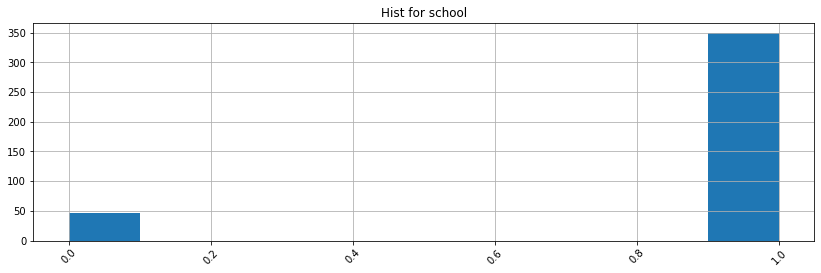

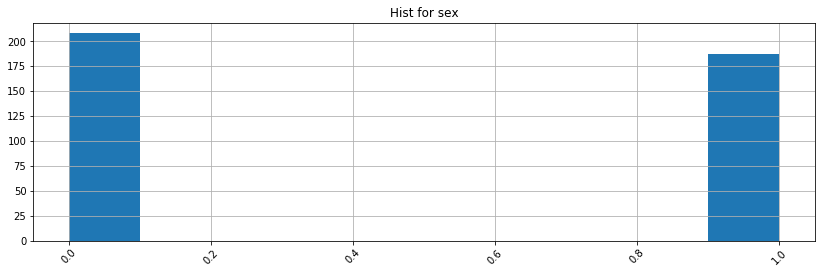

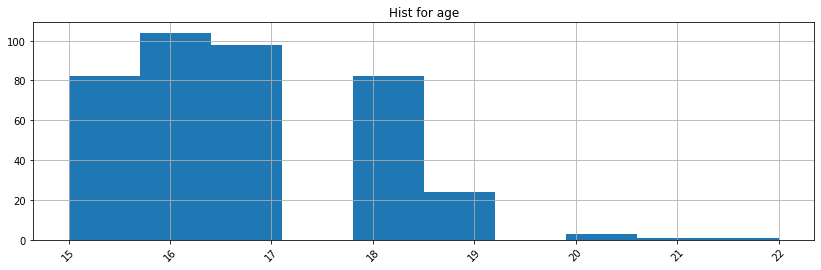

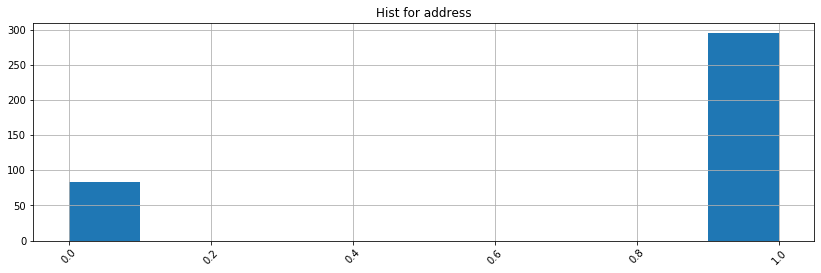

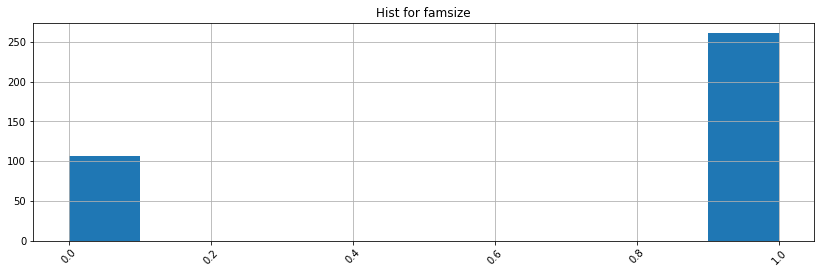

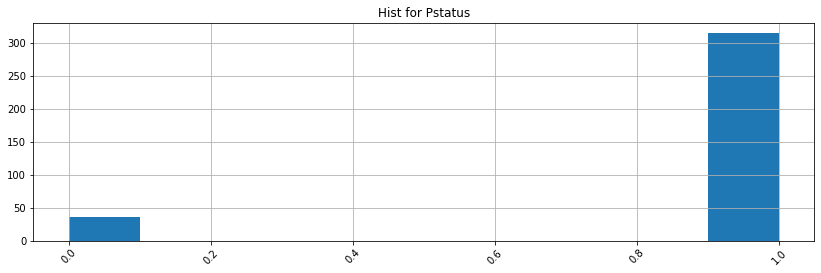

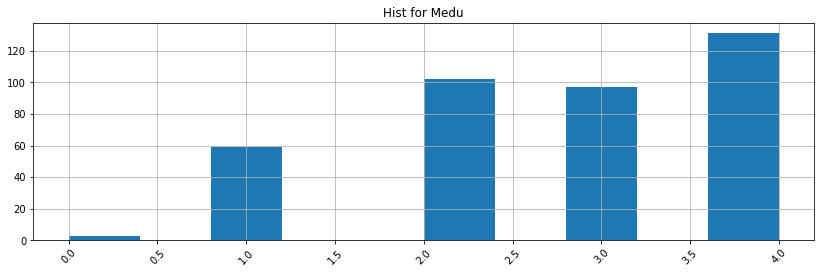

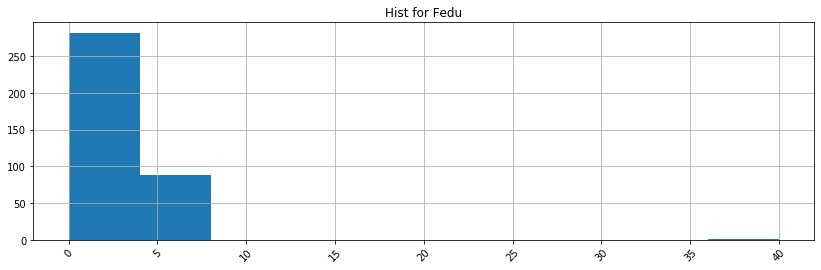

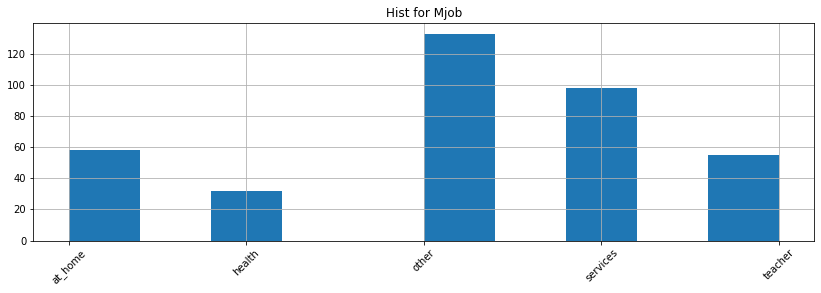

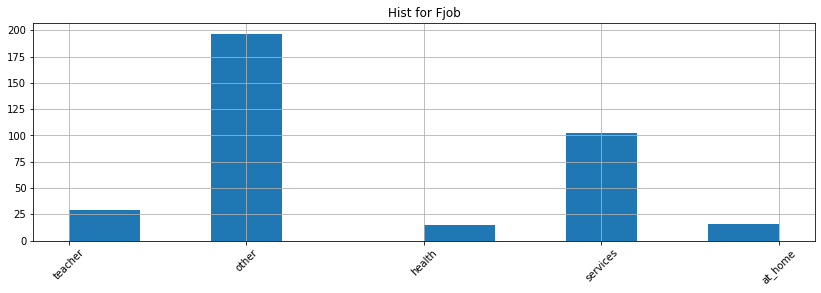

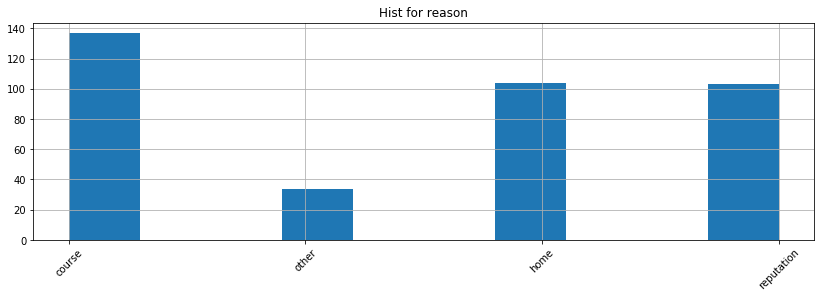

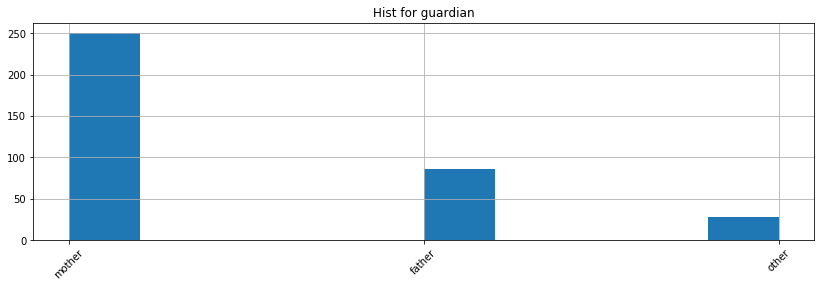

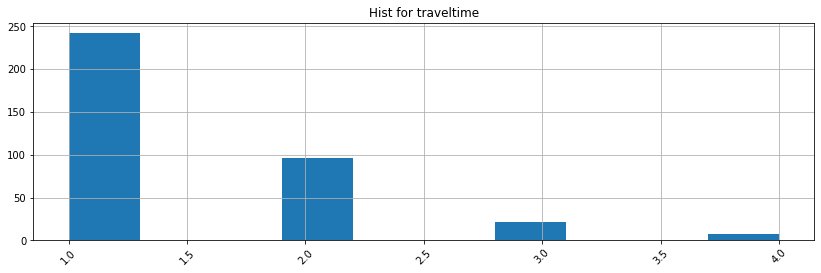

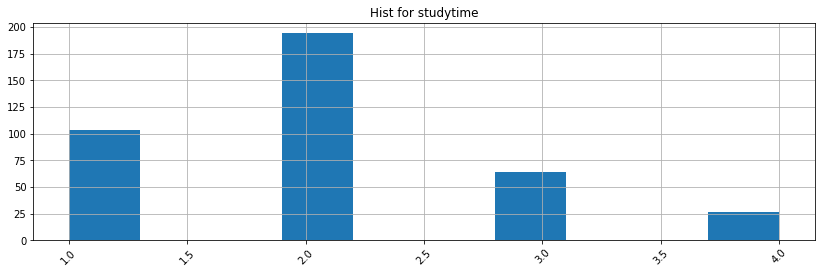

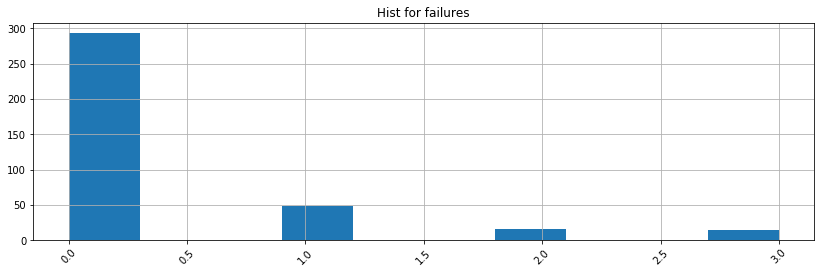

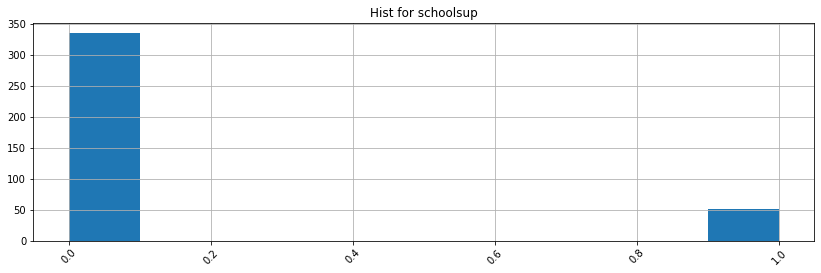

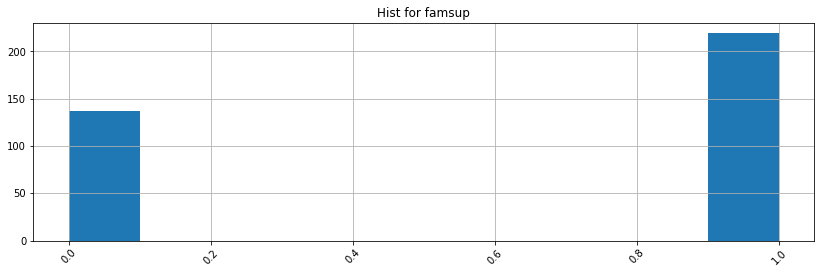

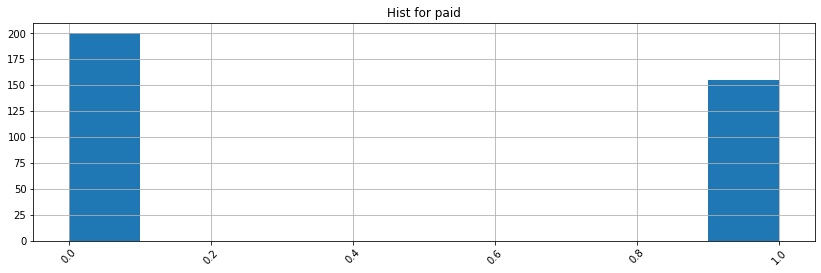

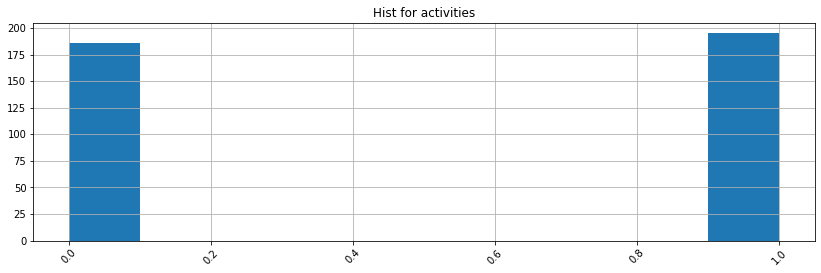

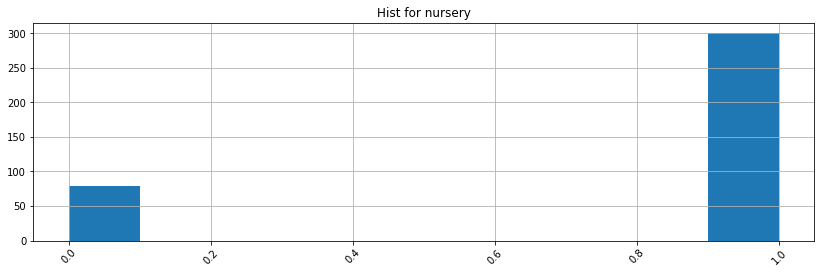

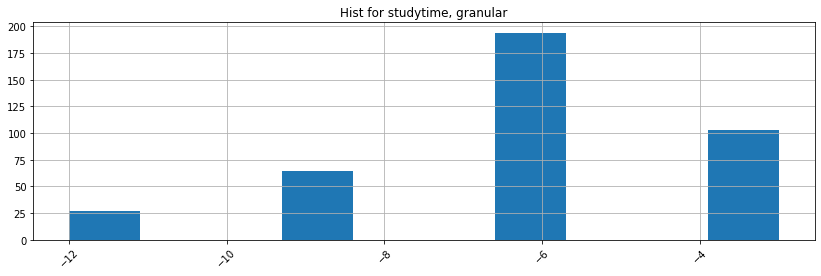

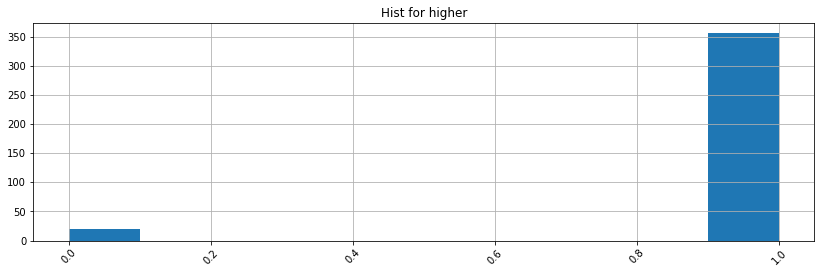

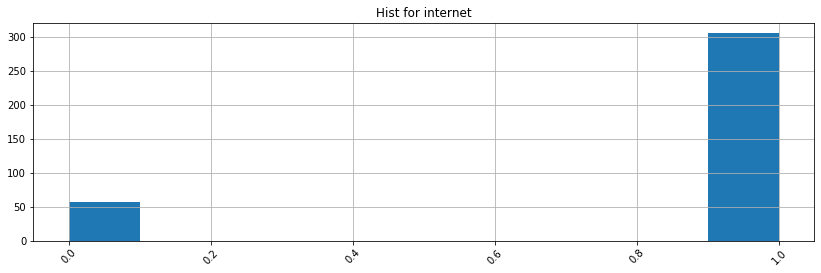

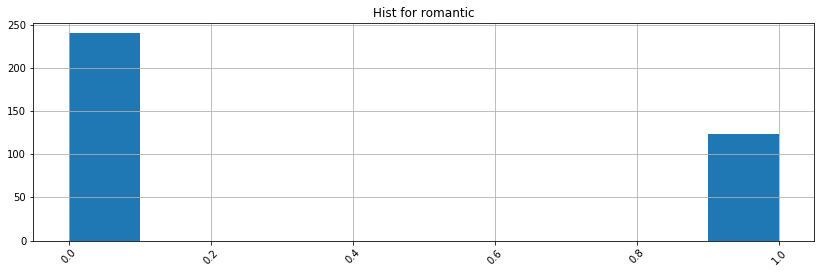

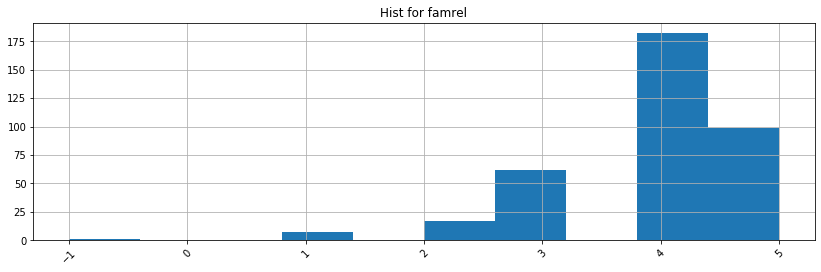

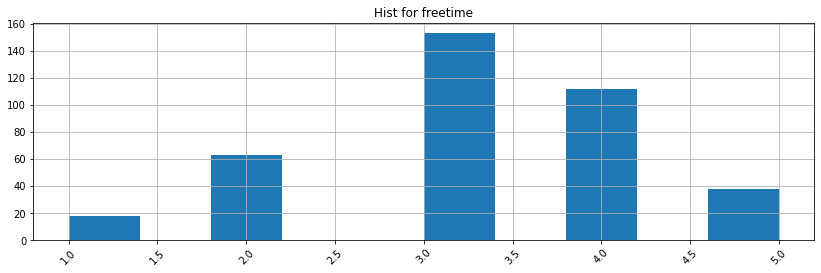

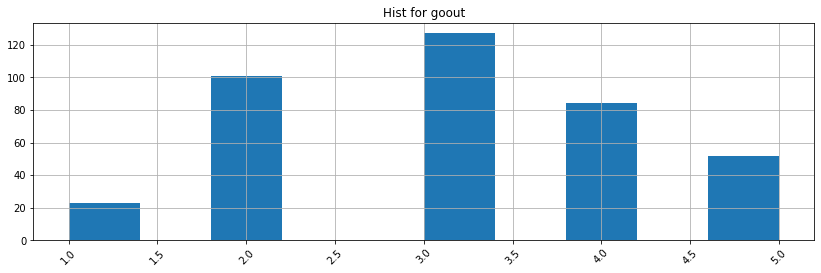

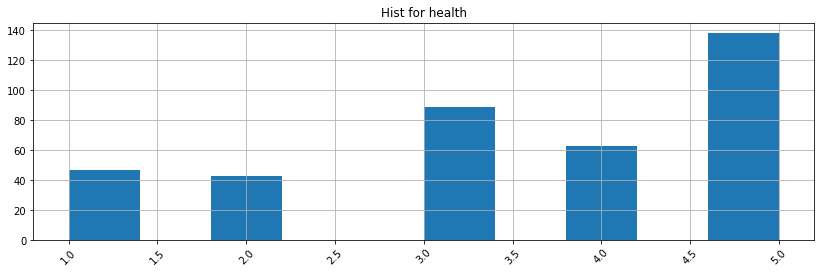

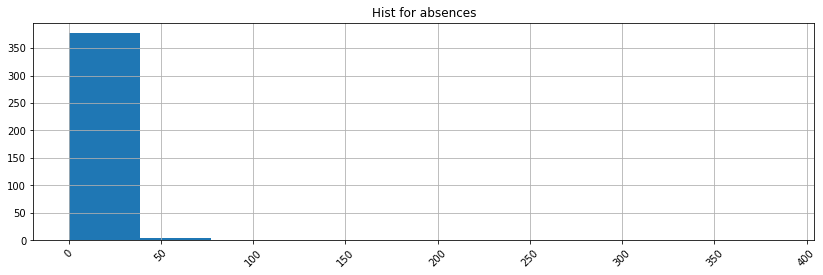

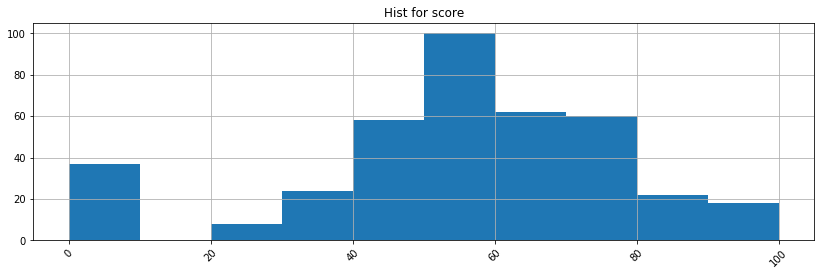

In [614]:
#Ищем потенциальные вылеты и странности, оцениваем распределение и пропорции - done!
for col in df.columns:
    get_his4Val(col)

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null int64
sex                    395 non-null int64
age                    395 non-null int64
address                378 non-null float64
famsize                368 non-null float64
Pstatus                350 non-null float64
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null float64
famsup                 356 non-null float64
paid                   355 non-null float64
activities             381 non-null float64
nursery                379 non-null float64
studytime, granular    38

---------------------------------------------------------------
# Образованию отца <strong><i>Fedu</i></strong>
Убираем вылет принимаем, что ошиблись при вводе. ввели 40 д.б. 4.0 Уровень образования 0-оставляем т.к. он есть в классификации и встречается в жизни. 

In [616]:
df.loc[df.Fedu == 40,'Fedu'] = 4

----------------------------------------------------------------------------
#  Проверяем <strong><i>age</i></strong>

--age--  perc25 - 1.5*IQR=13.0; perc25=16.0; IQR=2.0; perc75=18.0; perc75 + 1.5*IQR =21.0; median=17.0; mean=16.696202531645568; min=15; max=22


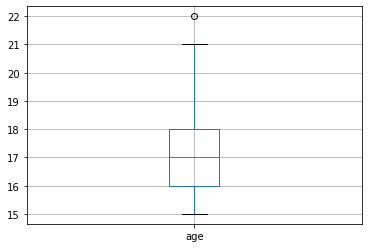

In [617]:
df.boxplot('age')
getMainStatistics('age')

df.age >18 #Старше 18 лет 29чел. 7% от общего числа и все похожи на "живых людей"

----------------------------------------------------------------
<strong><i>famrel</i></strong> Есть 1 выброс -1 - предполагаем, что ошибка ввода или так плохо в семье :) - назначаем наиболее логичное значение 


In [618]:
#famrel Есть 1 выброс -1 - предполагаем, что ошибка ввода или так плохо в семье :) - назначаем наиболее логичное значение 
df.loc[df.famrel < 1,'famrel'] = 1


---------------------------------------------------
#  Прогулы <strong><i>abscences</i></strong>
Предполагаю, что это к-во занятий, а не дней. Вылетов (всё что больше perc75 + 1.5*IQR) всего 4.3% Если исходить из того, что чебный год в длится, как правило, 170-180 дней и absences - это количество пропущенных ЛЮБЫХ учебных занятий, то даже 385 занятий - это 2-3 пропущенных занятия в день. Логичных причин может быть много, например освобождение от занятий в связи с домашним обучением и/или результатами или просто прогулами, таких всего 0.5%. 

Для упрощения понимания общей картины, всё равно заменим  "вылеты" более 75 на медианное значение. 

--absences--  perc25 - 1.5*IQR=-12.0; perc25=0.0; IQR=8.0; perc75=8.0; perc75 + 1.5*IQR =20.0; median=4.0; mean=7.2793733681462145; min=0.0; max=385.0


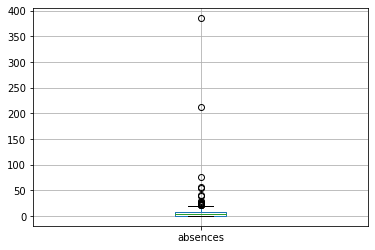

In [619]:
df.boxplot('absences')
getMainStatistics('absences')
#df[df.absences > 20]

absences подверглось обработке  0.51 %
--absences--  perc25 - 1.5*IQR=-12.0; perc25=0.0; IQR=8.0; perc75=8.0; perc75 + 1.5*IQR =20.0; median=4.0; mean=5.741514360313316; min=0.0; max=75.0


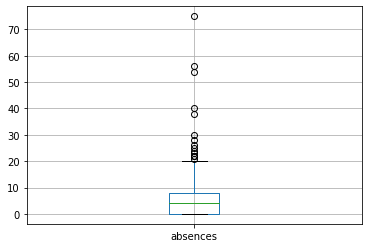

In [620]:
print('absences подверглось обработке ',round(len(df[df.absences > 75])/len(df.index) * 100,2),'%') #20
 
df.loc[df.absences > 75,'absences'] = df.absences.median() #20
df.boxplot('absences')
getMainStatistics('absences')

-------------------------------------------------------------------------------
#  Здесь нужно разобраться руками -- отработка технологии

In [621]:

display(df.loc[ (df.index!=-1) & (pd.isna(df.address)) & ( (pd.isna(df.internet)) | (pd.isna(df.traveltime)) | (pd.isna(df.failures)) | (pd.isna(df.Medu)) | (pd.isna(df.score)) )])
df.loc[ (df.index==92) , ['address','Medu']]=[0, 1] # по всем признакам это address=R, Medu=1 для этой группы образования

df.loc[ (df.index==52) , ['address','Fjob', 'famsup', 'internet']]=[0, 'other', 0, 0] # по всем признакам это address=R, Fjob=other исходя из Образование, работа матери + образование отца для выяснениия возможной работы отца, famsup =0 т.к. разведенные родители, ребенок живет с отцом, отец с невысоким уровнем образования

df.loc[ (df.index==241) , ['address','traveltime', 'goout']]=[1, 1, 3] # по всем признакам это address=U traveltime =1 как самое распространенное для U; df[(df.freetime==3) & (df.age==17)].groupby([ 'freetime', 'age', 'score', 'failures', 'internet','goout'])['age'].count() - 3 для goout

df.loc[ (df.index==270) , ['address','score', 'goout', 'score']]=[1, 1, 3, 30]

df.loc[ (df.index==348) , ['address','famrel']]=[1, 4] #calcNumbFeature(groupbyList=['famrel', 'freetime', 'age', 'sex'], filterQuery=' (freetime ==4) & (age == 17) & (sex == 0) ', targetFeature='famrel',  func='mostfreq', silent=False)[0]

df.loc[ (df.index==350) , ['address','nursery', 'score']]=[0, 0, 50]  

df.loc[ (df.index==372) , ['address','traveltime', 'romantic']]=[1, 1, 0] 
print (len(df.loc[ (df.index!=-1) & (pd.isna(df.address)) & ( (pd.isna(df.internet)) | (pd.isna(df.traveltime)) | (pd.isna(df.failures)) | (pd.isna(df.Medu)) | (pd.isna(df.score)) )].index))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
52,1,1,15,NaN,0.0,0.0,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,-3.0,1.0,NaN,0.0,5.0,5.0,5.0,5.0,6.0,50.0
92,1,0,16,NaN,0.0,1.0,NaN,1.0,other,other,home,father,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,-6.0,1.0,0.0,0.0,3.0,3.0,NaN,2.0,4.0,30.0
241,1,1,17,NaN,0.0,0.0,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,0.0,1.0,1.0,0.0,1.0,-6.0,1.0,1.0,0.0,3.0,3.0,NaN,4.0,2.0,60.0
270,1,0,19,NaN,1.0,1.0,3.0,3.0,other,services,home,other,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,-6.0,1.0,1.0,0.0,4.0,3.0,5.0,5.0,NaN,NaN
348,1,0,17,NaN,1.0,1.0,4.0,3.0,health,other,reputation,mother,NaN,3.0,0.0,0.0,1.0,1.0,1.0,1.0,-9.0,1.0,1.0,1.0,NaN,4.0,3.0,4.0,0.0,75.0
350,0,1,19,NaN,1.0,1.0,1.0,1.0,other,services,home,other,3.0,2.0,3.0,0.0,0.0,0.0,0.0,NaN,-6.0,1.0,1.0,0.0,5.0,4.0,4.0,2.0,8.0,NaN
372,0,0,17,NaN,1.0,1.0,2.0,2.0,other,at_home,home,mother,NaN,3.0,0.0,0.0,0.0,0.0,1.0,1.0,-9.0,1.0,0.0,NaN,3.0,4.0,3.0,3.0,8.0,55.0


0


------------------------------------------------------------------
#  Устраняем NaN в romantic

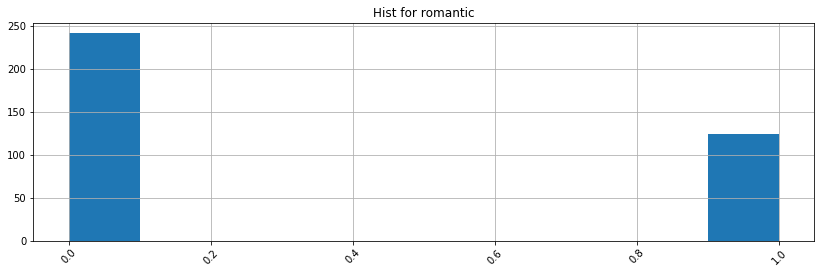

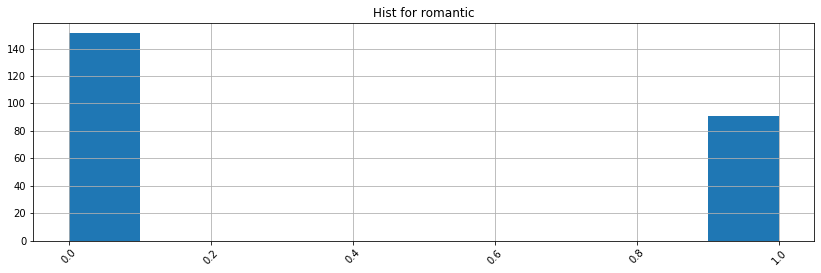

In [622]:
targetFeature = 'romantic'
filterFields=['age','sex', 'internet', 'failures','address', 'score']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['school'].count().reset_index()[targetFeature])

In [623]:
updateFeatureAutho(targetFeature, filterFields)

NaN в "romantic"  30 
filter = (age == 15) & (sex == 0) & (internet == 1.0) & (failures == 3.0) & (address == 1.0) & (score == 50.0); index = 2
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count


-------------------------------------------------------
filter = (age == 15) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 55.0); index = 13
Выбрано 1 строк; Случаев 2;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
24,0.0,15,1,1.0,0.0,1.0,55.0,2


-------------------------------------------------------
filter = (age == 15) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 55.0); index = 26
Выбрано 1 строк; Случаев 3;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
24,0.0,15,1,1.0,0.0,1.0,55.0,3


-------------------------------------------------------
filter = (age == 15) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 75.0); index = 27
Выбрано 1 строк; Случаев 4;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
28,0.0,15,1,1.0,0.0,1.0,75.0,4


-------------------------------------------------------
filter = (age == 15) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 60.0); index = 41
Выбрано 2 строк; Случаев 2;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
25,0.0,15,1,1.0,0.0,1.0,60.0,2
163,1.0,15,1,1.0,0.0,1.0,60.0,1


-------------------------------------------------------
filter = (age == 15) & (sex == 0) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 65.0); index = 51
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count


-------------------------------------------------------
filter = (age == 15) & (sex == 0) & (internet == 1.0) & (failures == nan) & (address == 1.0) & (score == 65.0); index = 54
filter = (age == 16) & (sex == 0) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 30.0); index = 67
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count


-------------------------------------------------------
filter = (age == 15) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == nan) & (score == 50.0); index = 75
filter = (age == 16) & (sex == 0) & (internet == 1.0) & (failures == 1.0) & (address == 1.0) & (score == 65.0); index = 112
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count


-------------------------------------------------------
filter = (age == 15) & (sex == 0) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 75.0); index = 139
Выбрано 2 строк; Случаев 2;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
14,0.0,15,0,1.0,0.0,1.0,75.0,2
159,1.0,15,0,1.0,0.0,1.0,75.0,1


-------------------------------------------------------
filter = (age == 15) & (sex == 0) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 55.0); index = 147
Выбрано 2 строк; Случаев 3;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
10,0.0,15,0,1.0,0.0,1.0,55.0,3
158,1.0,15,0,1.0,0.0,1.0,55.0,1


-------------------------------------------------------
filter = (age == 15) & (sex == 1) & (internet == nan) & (failures == 0.0) & (address == 0.0) & (score == 40.0); index = 155
filter = (age == 16) & (sex == 1) & (internet == nan) & (failures == 1.0) & (address == 1.0) & (score == 0.0); index = 162
filter = (age == 16) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 60.0); index = 181
Выбрано 1 строк; Случаев 2;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
65,0.0,16,1,1.0,0.0,1.0,60.0,2


-------------------------------------------------------
filter = (age == 16) & (sex == 0) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 65.0); index = 190
Выбрано 2 строк; Случаев 2;  Значение для romantic=[0. 1.]


,romantic,age,sex,internet,failures,address,score,count
44,0.0,16,0,1.0,0.0,1.0,65.0,2
174,1.0,16,0,1.0,0.0,1.0,65.0,2


-------------------------------------------------------
filter = (age == 16) & (sex == 1) & (internet == nan) & (failures == 0.0) & (address == 1.0) & (score == 70.0); index = 194
filter = (age == 16) & (sex == 0) & (internet == 1.0) & (failures == nan) & (address == 0.0) & (score == 55.0); index = 204
filter = (age == 18) & (sex == 1) & (internet == nan) & (failures == 1.0) & (address == 1.0) & (score == 0.0); index = 239
filter = (age == 18) & (sex == 1) & (internet == 1.0) & (failures == nan) & (address == 1.0) & (score == 40.0); index = 261
filter = (age == 17) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 50.0); index = 266
Выбрано 1 строк; Случаев 4;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
101,0.0,17,1,1.0,0.0,1.0,50.0,4


-------------------------------------------------------
filter = (age == 17) & (sex == 1) & (internet == 1.0) & (failures == nan) & (address == 1.0) & (score == 40.0); index = 280
filter = (age == 18) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 55.0); index = 290
Выбрано 1 строк; Случаев 1;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
133,0.0,18,1,1.0,0.0,1.0,55.0,1


-------------------------------------------------------
filter = (age == 17) & (sex == 0) & (internet == 0.0) & (failures == 0.0) & (address == 0.0) & (score == 90.0); index = 293
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count


-------------------------------------------------------
filter = (age == 19) & (sex == 1) & (internet == nan) & (failures == 1.0) & (address == 0.0) & (score == 60.0); index = 308
filter = (age == 18) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 40.0); index = 330
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count


-------------------------------------------------------
filter = (age == 17) & (sex == 0) & (internet == 1.0) & (failures == 0.0) & (address == 0.0) & (score == 50.0); index = 339
Выбрано 1 строк; Случаев 2;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
82,0.0,17,0,1.0,0.0,0.0,50.0,2


-------------------------------------------------------
filter = (age == 18) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 75.0); index = 342
Выбрано 1 строк; Случаев 1;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
138,0.0,18,1,1.0,0.0,1.0,75.0,1


-------------------------------------------------------
filter = (age == 17) & (sex == 0) & (internet == 1.0) & (failures == 0.0) & (address == 0.0) & (score == 25.0); index = 373
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count


-------------------------------------------------------
filter = (age == 18) & (sex == 1) & (internet == 1.0) & (failures == 0.0) & (address == 1.0) & (score == 70.0); index = 380
Выбрано 1 строк; Случаев 1;  Значение для romantic=[0.]


,romantic,age,sex,internet,failures,address,score,count
138,0.0,18,1,1.0,0.0,1.0,70.0,1


-------------------------------------------------------
НЕ Все NaN в "romantic" успешно заменены, осталось 10 из 395
Все NaN в "romantic" успешно заменены.


--------------------------------------------------------------


#  Устраняем NaN в famsize 
Промежуточные выводы:
1. Живущие <i>вместе</i> родители с образованием одного из родителей (или обоих) хуже чем "2" (менее 5-9 классов), скорее всего имеют одного ребенка -- LE3 0 Вероятно, бюджет не позволяет, НО до люмпен-пролетариата ещё не дошло т.к ребенок ходит в школу. </br>  
2. Portugal Average family size 2015 --2019 2.5
https://www.pordata.pt/en/Portugal/Average+private+households+size+-511
Т.о., для группы живущих <i>вместе</i> родителей (т.к. 2.5 ближе к 3) принимаем пропущенные значения famsize = 'LE3' 0  
<!--3. Для учеников имеющих родителей живущих порознь, важен параметр absences, при значении 9 и выше принимаем пропущенные famsize значения = 'LE3'. По всей видимости, ребенком некому заниматься-->  




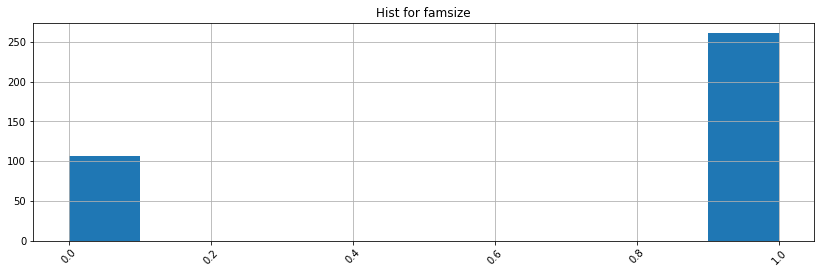

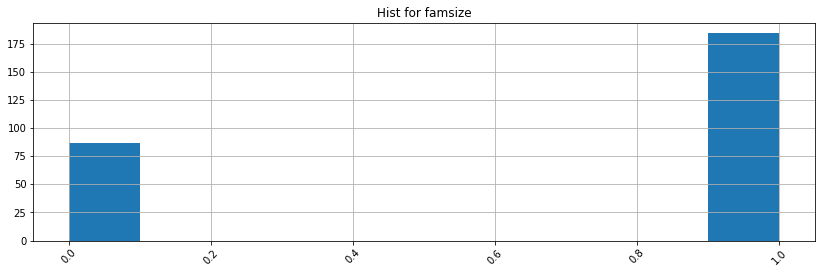

In [734]:
targetFeature = 'famsize'
filterFields=['Pstatus', 'famrel','nursery', 'Medu','Fedu','Mjob', 'Fjob','guardian']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

In [736]:
updateFeatureAutho(targetFeature, filterFields)

NaN в "famsize"  27 
filter = (Pstatus == 0.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 4.0) & (Mjob == "at_home") & (Fjob == "teacher") & (guardian == "mother"); index = 0
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 0.0) & (famrel == 5.0) & (nursery == 1.0) & (Medu == 3.0) & (Fedu == 4.0) & (Mjob == "other") & (Fjob == "other") & (guardian == "mother"); index = 9
Выбрано 2 строк; Случаев 1;  Значение для famsize=[0. 1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
5,0.0,0.0,5.0,1.0,3.0,4.0,other,other,mother,1
102,1.0,0.0,5.0,1.0,3.0,4.0,other,other,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == nan) & (Medu == 4.0) & (Fedu == 3.0) & (Mjob == "teacher") & (Fjob == "at_home") & (guardian == "mother"); index = 32
filter = (Pstatus == 1.0) & (famrel == 5.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 3.0) & (Mjob == "teacher") & (Fjob == "services") & (guardian == "mother"); index = 36
Выбрано 2 строк; Случаев 1;  Значение для famsize=[0. 1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
83,0.0,1.0,5.0,1.0,4.0,3.0,teacher,services,mother,1
268,1.0,1.0,5.0,1.0,4.0,3.0,teacher,services,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 0.0) & (Mjob == "teacher") & (Fjob == "other") & (guardian == "mother"); index = 76
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "other") & (Fjob == "other") & (guardian == "mother"); index = 78
Выбрано 2 строк; Случаев 3;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
47,0.0,1.0,4.0,1.0,2.0,1.0,other,other,mother,1
171,1.0,1.0,4.0,1.0,2.0,1.0,other,other,mother,3


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 2.0) & (nursery == 1.0) & (Medu == 3.0) & (Fedu == 4.0) & (Mjob == "at_home") & (Fjob == "other") & (guardian == "mother"); index = 79
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (nursery == 1.0) & (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "health") & (Fjob == "services") & (guardian == "mother"); index = 114
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (nursery == 1.0) & (Medu == 2.0) & (Fedu == 2.0) & (Mjob == "at_home") & (Fjob == "other") & (guardian == "mother"); index = 128
Выбрано 1 строк; Случаев 1;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
130,1.0,1.0,3.0,1.0,2.0,2.0,at_home,other,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 4.0) & (Mjob == "teacher") & (Fjob == "teacher") & (guardian == "mother"); index = 129
Выбрано 1 строк; Случаев 1;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
148,1.0,1.0,3.0,1.0,4.0,4.0,teacher,teacher,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 2.0) & (Mjob == "health") & (Fjob == "services") & (guardian == "father"); index = 167
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 4.0) & (Mjob == "teacher") & (Fjob == "other") & (guardian == "mother"); index = 172
Выбрано 1 строк; Случаев 2;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
227,1.0,1.0,4.0,1.0,4.0,4.0,teacher,other,mother,2


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == nan) & (nursery == 1.0) & (Medu == 2.0) & (Fedu == 2.0) & (Mjob == "services") & (Fjob == "services") & (guardian == "father"); index = 195
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 0.0) & (Medu == 1.0) & (Fedu == 1.0) & (Mjob == "other") & (Fjob == "other") & (guardian == "mother"); index = 202
Выбрано 1 строк; Случаев 1;  Значение для famsize=[0.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
33,0.0,1.0,4.0,0.0,1.0,1.0,other,other,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 1.0) & (Fedu == 1.0) & (Mjob == "at_home") & (Fjob == "other") & (guardian == "mother"); index = 221
Выбрано 2 строк; Случаев 1;  Значение для famsize=[0. 1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
39,0.0,1.0,4.0,1.0,1.0,1.0,at_home,other,mother,1
166,1.0,1.0,4.0,1.0,1.0,1.0,at_home,other,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "at_home") & (Fjob == "other") & (guardian == "mother"); index = 228
Выбрано 1 строк; Случаев 1;  Значение для famsize=[0.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
46,0.0,1.0,4.0,1.0,2.0,1.0,at_home,other,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (nursery == 1.0) & (Medu == 3.0) & (Fedu == 2.0) & (Mjob == "at_home") & (Fjob == "other") & (guardian == nan); index = 235
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "other") & (Fjob == "other") & (guardian == "mother"); index = 237
Выбрано 2 строк; Случаев 4;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
47,0.0,1.0,4.0,1.0,2.0,1.0,other,other,mother,1
172,1.0,1.0,4.0,1.0,2.0,1.0,other,other,mother,4


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (nursery == 0.0) & (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "services") & (Fjob == "services") & (guardian == "mother"); index = 252
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (nursery == 0.0) & (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "other") & (Fjob == "other") & (guardian == "mother"); index = 253
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 0.0) & (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "other") & (Fjob == "other") & (guardian == "mother"); index = 254
Выбрано 1 строк; Случаев 1;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
157,1.0,1.0,4.0,0.0,2.0,1.0,other,other,mother,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 2.0) & (Mjob == "other") & (Fjob == "other") & (guardian == "father"); index = 268
Выбрано 1 строк; Случаев 1;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count
267,1.0,1.0,5.0,1.0,4.0,2.0,other,other,father,1


-------------------------------------------------------
filter = (Pstatus == 0.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 4.0) & (Fedu == 3.0) & (Mjob == "services") & (Fjob == "other") & (guardian == "mother"); index = 280
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 0.0) & (Medu == 3.0) & (Fedu == 2.0) & (Mjob == "services") & (Fjob == "other") & (guardian == "other"); index = 313
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (nursery == 1.0) & (Medu == 2.0) & (Fedu == 3.0) & (Mjob == "at_home") & (Fjob == "other") & (guardian == nan); index = 344
filter = (Pstatus == 0.0) & (famrel == nan) & (nursery == 1.0) & (Medu == 1.0) & (Fedu == 4.0) & (Mjob == "at_home") & (Fjob == "other") & (guardian == "mother"); index = 360
filter = (Pstatus == 1.0) & (famrel == 5.0) & (nursery == 1.0) & (Medu == 1.0) & (Fedu == 1.0) & (Mjob == "other") & (Fjob == "services") & (guardian == "mother"); index = 367
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для famsize=[1.]


,famsize,Pstatus,famrel,nursery,Medu,Fedu,Mjob,Fjob,guardian,count


-------------------------------------------------------
НЕ Все NaN в "famsize" успешно заменены, осталось 5 из 395
Все NaN в "famsize" успешно заменены.


---------------------------------------------------------------------------------
#  Устраняем NaN в address

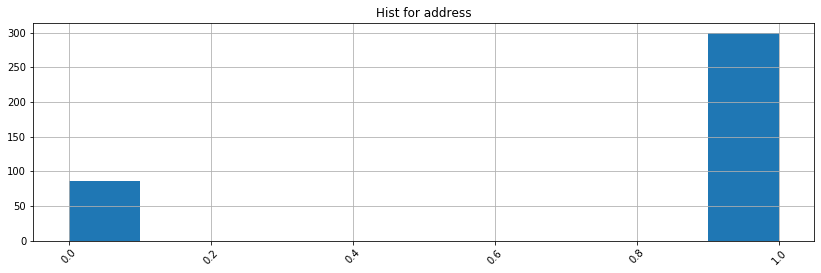

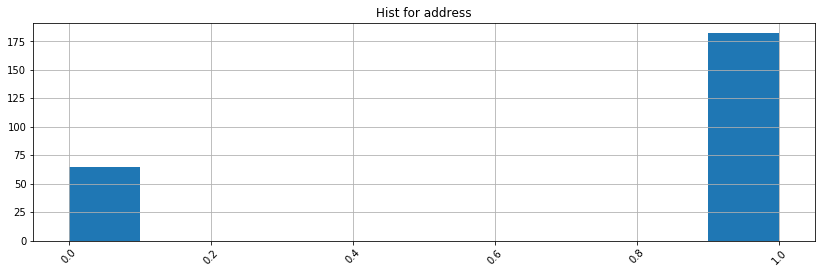

In [650]:
targetFeature = 'address'
filterFields=['Medu','Fedu','Mjob','Fjob','Pstatus',  'reason', 'age']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['school'].count().reset_index()[targetFeature])

In [652]:
updateFeatureAutho(targetFeature, filterFields)

NaN в "address"  10 
filter = (Medu == 2.0) & (Fedu == 2.0) & (Mjob == "other") & (Fjob == "other") & (Pstatus == 1.0) & (reason == "home") & (age == 16); index = 6
Выбрано 1 строк; Случаев 2;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count
109,1.0,2.0,2.0,other,other,1.0,home,16,2


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (Mjob == "teacher") & (Fjob == "other") & (Pstatus == 1.0) & (reason == "home") & (age == 15); index = 75
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (Mjob == "services") & (Fjob == "other") & (Pstatus == nan) & (reason == "reputation") & (age == 16); index = 96
filter = (Medu == 3.0) & (Fedu == nan) & (Mjob == "other") & (Fjob == "services") & (Pstatus == 1.0) & (reason == "course") & (age == 16); index = 159
filter = (Medu == 2.0) & (Fedu == 2.0) & (Mjob == "other") & (Fjob == "other") & (Pstatus == 1.0) & (reason == "home") & (age == 16); index = 168
Выбрано 1 строк; Случаев 3;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count
109,1.0,2.0,2.0,other,other,1.0,home,16,3


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "other") & (Fjob == "other") & (Pstatus == 1.0) & (reason == "course") & (age == 17); index = 254
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 1.0) & (Mjob == "services") & (Fjob == "at_home") & (Pstatus == 1.0) & (reason == "reputation") & (age == 18); index = 292
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (Mjob == "services") & (Fjob == "other") & (Pstatus == 1.0) & (reason == "home") & (age == 17); index = 354
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 1.0) & (Mjob == "at_home") & (Fjob == "services") & (Pstatus == 1.0) & (reason == "course") & (age == 18); index = 359
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 2.0) & (Mjob == "health") & (Fjob == "other") & (Pstatus == 1.0) & (reason == "course") & (age == 20); index = 376
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для address=[1.]


,address,Medu,Fedu,Mjob,Fjob,Pstatus,reason,age,count


-------------------------------------------------------
НЕ Все NaN в "address" успешно заменены, осталось 2 из 395
Все NaN в "address" успешно заменены.


--------------------------------------------------------
#  Устраняем NaN в Medu

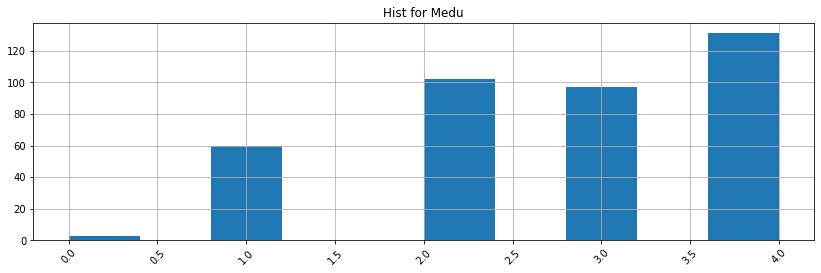

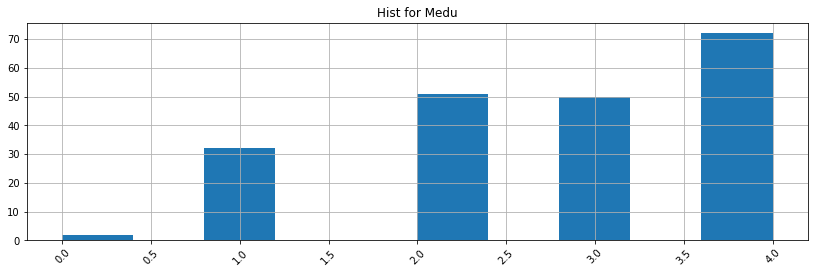

In [676]:
targetFeature = 'Medu'
filterFields=['Fedu','Mjob','Fjob','famrel', 'famsup']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['school'].count().reset_index()[targetFeature])

In [677]:
updateFeatureAutho(targetFeature, filterFields)

NaN в "Medu"  2 
filter = (Fedu == 3.0) & (Mjob == "services") & (Fjob == "services") & (famrel == 4.0) & (famsup == 1.0); index = 193
Выбрано 2 строк; Случаев 2;  Значение для Medu=[3.]


,Medu,Fedu,Mjob,Fjob,famrel,famsup,count
120,3.0,3.0,services,services,4.0,1.0,2
157,4.0,3.0,services,services,4.0,1.0,1


-------------------------------------------------------
filter = (Fedu == 2.0) & (Mjob == "other") & (Fjob == "services") & (famrel == 5.0) & (famsup == 0.0); index = 239
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для Medu=[4.]


,Medu,Fedu,Mjob,Fjob,famrel,famsup,count


-------------------------------------------------------
Все NaN в "Medu" успешно заменены.


--------------------------------------------------------
#  Устраняем NaN в Pstatus

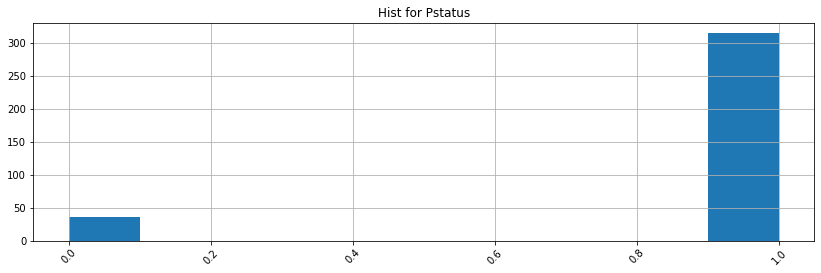

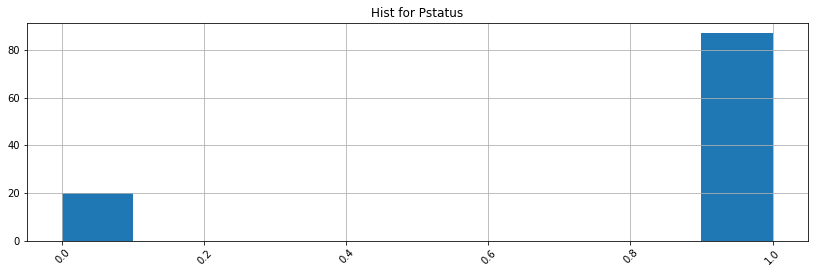

In [684]:
targetFeature = 'Pstatus'
filterFields=['Medu','Fedu','address','famrel']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

In [685]:
updateFeatureAutho(targetFeature, filterFields)


NaN в "Pstatus"  45 
filter = (Medu == 1.0) & (Fedu == 1.0) & (address == 1.0) & (famrel == 5.0); index = 1
Выбрано 1 строк; Случаев 4;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
31,1.0,1.0,1.0,1.0,5.0,4


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 5.0); index = 9
Выбрано 2 строк; Случаев 2;  Значение для Pstatus=[0.]


,Pstatus,Medu,Fedu,address,famrel,count
11,0.0,3.0,4.0,1.0,5.0,2
83,1.0,3.0,4.0,1.0,5.0,1


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 5.0); index = 11
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 4.0); index = 15
Выбрано 2 строк; Случаев 19;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
18,0.0,4.0,4.0,1.0,4.0,4
106,1.0,4.0,4.0,1.0,4.0,19


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 1.0); index = 25
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 5.0); index = 28
Выбрано 2 строк; Случаев 3;  Значение для Pstatus=[0.]


,Pstatus,Medu,Fedu,address,famrel,count
11,0.0,3.0,4.0,1.0,5.0,3
85,1.0,3.0,4.0,1.0,5.0,1


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 5.0); index = 54
Выбрано 1 строк; Случаев 7;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
79,1.0,3.0,3.0,1.0,5.0,7


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 3.0); index = 63
Выбрано 1 строк; Случаев 3;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
97,1.0,4.0,3.0,1.0,3.0,3


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == nan) & (address == 1.0) & (famrel == 4.0); index = 67
filter = (Medu == 2.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 5.0); index = 81
Выбрано 1 строк; Случаев 3;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
60,1.0,2.0,3.0,1.0,5.0,3


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 3.0); index = 96
Выбрано 1 строк; Случаев 4;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
97,1.0,4.0,3.0,1.0,3.0,4


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 4.0) & (address == 0.0) & (famrel == 1.0); index = 108
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 3.0); index = 112
Выбрано 2 строк; Случаев 5;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
1,0.0,2.0,2.0,1.0,3.0,2
52,1.0,2.0,2.0,1.0,3.0,5


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 1.0) & (address == 1.0) & (famrel == 4.0); index = 131
Выбрано 1 строк; Случаев 11;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
30,1.0,1.0,1.0,1.0,4.0,11


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 4.0); index = 139
Выбрано 2 строк; Случаев 20;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
18,0.0,4.0,4.0,1.0,4.0,4
108,1.0,4.0,4.0,1.0,4.0,20


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 4.0); index = 147
Выбрано 1 строк; Случаев 4;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
36,1.0,1.0,2.0,1.0,4.0,4


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 1.0) & (address == 1.0) & (famrel == 4.0); index = 149
Выбрано 1 строк; Случаев 10;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
45,1.0,2.0,1.0,1.0,4.0,10


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 4.0); index = 153
Выбрано 1 строк; Случаев 5;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
74,1.0,3.0,2.0,1.0,4.0,5


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 2.0) & (address == 0.0) & (famrel == 4.0); index = 158
Выбрано 1 строк; Случаев 5;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
48,1.0,2.0,2.0,0.0,4.0,5


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 4.0); index = 174
Выбрано 2 строк; Случаев 13;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
9,0.0,3.0,3.0,1.0,4.0,1
78,1.0,3.0,3.0,1.0,4.0,13


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 5.0); index = 182
Выбрано 1 строк; Случаев 1;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
63,1.0,2.0,4.0,1.0,5.0,1


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 5.0); index = 183
Выбрано 1 строк; Случаев 8;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
79,1.0,3.0,3.0,1.0,5.0,8


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 3.0); index = 186
Выбрано 1 строк; Случаев 1;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
35,1.0,1.0,2.0,1.0,3.0,1


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 3.0) & (address == 0.0) & (famrel == 4.0); index = 193
Выбрано 1 строк; Случаев 4;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
76,1.0,3.0,3.0,0.0,4.0,4


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 3.0) & (address == 0.0) & (famrel == 3.0); index = 197
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 4.0); index = 198
Выбрано 2 строк; Случаев 21;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
18,0.0,4.0,4.0,1.0,4.0,4
109,1.0,4.0,4.0,1.0,4.0,21


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 4.0); index = 210
Выбрано 2 строк; Случаев 14;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
9,0.0,3.0,3.0,1.0,4.0,1
79,1.0,3.0,3.0,1.0,4.0,14


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 5.0); index = 227
Выбрано 1 строк; Случаев 4;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
60,1.0,2.0,3.0,1.0,5.0,4


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 1.0) & (address == 1.0) & (famrel == 3.0); index = 234
Выбрано 1 строк; Случаев 3;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
29,1.0,1.0,1.0,1.0,3.0,3


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 5.0); index = 239
Выбрано 1 строк; Случаев 3;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
93,1.0,4.0,2.0,1.0,5.0,3


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 1.0) & (address == 1.0) & (famrel == 4.0); index = 245
Выбрано 1 строк; Случаев 11;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
45,1.0,2.0,1.0,1.0,4.0,11


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 1.0) & (address == 1.0) & (famrel == 3.0); index = 252
Выбрано 1 строк; Случаев 1;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
44,1.0,2.0,1.0,1.0,3.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 3.0); index = 260
Выбрано 1 строк; Случаев 5;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
98,1.0,4.0,3.0,1.0,3.0,5


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 4.0) & (address == 0.0) & (famrel == 4.0); index = 265
Выбрано 1 строк; Случаев 3;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
81,1.0,3.0,4.0,0.0,4.0,3


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 1.0) & (address == 1.0) & (famrel == 5.0); index = 266
Выбрано 1 строк; Случаев 1;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
69,1.0,3.0,1.0,1.0,5.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 5.0); index = 268
Выбрано 1 строк; Случаев 4;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
93,1.0,4.0,2.0,1.0,5.0,4


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 4.0); index = 271
Выбрано 1 строк; Случаев 4;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
59,1.0,2.0,3.0,1.0,4.0,4


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 1.0) & (address == 0.0) & (famrel == 5.0); index = 282
Выбрано 1 строк; Случаев 5;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
26,1.0,1.0,1.0,0.0,5.0,5


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (address == 1.0) & (famrel == 4.0); index = 298
Выбрано 2 строк; Случаев 11;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
13,0.0,4.0,3.0,1.0,4.0,2
99,1.0,4.0,3.0,1.0,4.0,11


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 4.0); index = 307
Выбрано 2 строк; Случаев 22;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
18,0.0,4.0,4.0,1.0,4.0,4
109,1.0,4.0,4.0,1.0,4.0,22


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 4.0); index = 313
Выбрано 1 строк; Случаев 6;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
74,1.0,3.0,2.0,1.0,4.0,6


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 4.0); index = 333
Выбрано 2 строк; Случаев 13;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
2,0.0,2.0,2.0,1.0,4.0,1
53,1.0,2.0,2.0,1.0,4.0,13


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 4.0) & (address == 1.0) & (famrel == 4.0); index = 342
Выбрано 1 строк; Случаев 2;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
85,1.0,3.0,4.0,1.0,4.0,2


-------------------------------------------------------
filter = (Medu == 3.0) & (Fedu == 2.0) & (address == 1.0) & (famrel == 1.0); index = 357
Выбрано 1 строк; Случаев 1;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
72,1.0,3.0,2.0,1.0,1.0,1


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 2.0) & (address == 0.0) & (famrel == 3.0); index = 364
Выбрано 1 строк; Случаев 2;  Значение для Pstatus=[1.]


,Pstatus,Medu,Fedu,address,famrel,count
33,1.0,1.0,2.0,0.0,3.0,2


-------------------------------------------------------
НЕ Все NaN в "Pstatus" успешно заменены, осталось 1 из 395
Все NaN в "Pstatus" успешно заменены.


-------------------------------------------
#  Устраняем NaN в образовании отца Fedu

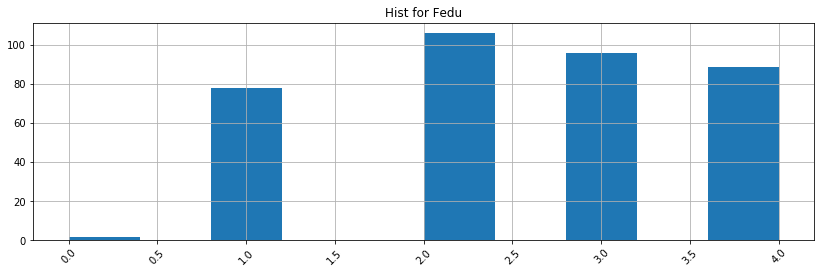

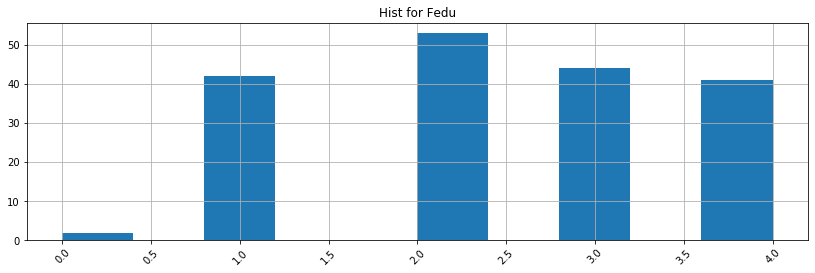

In [698]:
targetFeature = 'Fedu'
filterFields=['Medu', 'Fjob','address', 'famsup', 'nursery','paid','schoolsup']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

In [699]:
updateFeatureAutho(targetFeature, filterFields)

NaN в "Fedu"  24 
filter = (Medu == 4.0) & (Fjob == "health") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == nan) & (schoolsup == 0.0); index = 21
filter = (Medu == 4.0) & (Fjob == "teacher") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 42
Выбрано 1 строк; Случаев 4;  Значение для Fedu=[4.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
179,4.0,4.0,teacher,1.0,1.0,1.0,0.0,0.0,4


-------------------------------------------------------
filter = (Medu == 3.0) & (Fjob == "services") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 46
Выбрано 1 строк; Случаев 4;  Значение для Fedu=[3.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
122,3.0,3.0,services,1.0,1.0,1.0,0.0,0.0,4


-------------------------------------------------------
filter = (Medu == 4.0) & (Fjob == "health") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == nan) & (schoolsup == 0.0); index = 57
filter = (Medu == 1.0) & (Fjob == "at_home") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 1.0); index = 58
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для Fedu=[2.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count


-------------------------------------------------------
filter = (Medu == 3.0) & (Fjob == "other") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 1.0); index = 67
Выбрано 1 строк; Случаев 1;  Значение для Fedu=[2.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
88,2.0,3.0,other,1.0,1.0,1.0,1.0,1.0,1


-------------------------------------------------------
filter = (Medu == 3.0) & (Fjob == "other") & (address == 1.0) & (famsup == 1.0) & (nursery == 0.0) & (paid == 0.0) & (schoolsup == 0.0); index = 137
Выбрано 2 строк; Случаев 1;  Значение для Fedu=[3. 4.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
115,3.0,3.0,other,1.0,1.0,0.0,0.0,0.0,1
150,4.0,3.0,other,1.0,1.0,0.0,0.0,0.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (Fjob == "services") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 142
Выбрано 3 строк; Случаев 3;  Значение для Fedu=[3. 4.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
97,2.0,4.0,services,1.0,1.0,1.0,1.0,0.0,1
141,3.0,4.0,services,1.0,1.0,1.0,1.0,0.0,3
169,4.0,4.0,services,1.0,1.0,1.0,1.0,0.0,3


-------------------------------------------------------
filter = (Medu == 3.0) & (Fjob == "services") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 159
Выбрано 3 строк; Случаев 1;  Значение для Fedu=[1. 3. 4.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
43,1.0,3.0,services,1.0,1.0,1.0,1.0,0.0,1
124,3.0,3.0,services,1.0,1.0,1.0,1.0,0.0,1
153,4.0,3.0,services,1.0,1.0,1.0,1.0,0.0,1


-------------------------------------------------------
filter = (Medu == 3.0) & (Fjob == nan) & (address == 0.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 1.0); index = 161
filter = (Medu == 4.0) & (Fjob == "other") & (address == 1.0) & (famsup == nan) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 180
filter = (Medu == 2.0) & (Fjob == "services") & (address == 1.0) & (famsup == nan) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 195
filter = (Medu == 4.0) & (Fjob == "teacher") & (address == 1.0) & (famsup == nan) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 1.0); index = 232
filter = (Medu == 2.0) & (Fjob == "other") & (address == 1.0) & (famsup == 0.0) & (nursery == 0.0) & (paid == nan) & (schoolsup == 0.0); index = 236
filter = (Medu == 2.0) & (Fjob == "services") & (address == 1.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 259
Выбрано 2 строк; Случаев 1;  Значение для Fedu

,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
34,1.0,2.0,services,1.0,0.0,1.0,1.0,0.0,1
76,2.0,2.0,services,1.0,0.0,1.0,1.0,0.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (Fjob == "other") & (address == 1.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 280
Выбрано 1 строк; Случаев 3;  Значение для Fedu=[3.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
132,3.0,4.0,other,1.0,0.0,1.0,1.0,0.0,3


-------------------------------------------------------
filter = (Medu == 3.0) & (Fjob == "services") & (address == 1.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 281
Выбрано 2 строк; Случаев 1;  Значение для Fedu=[2. 3.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
89,2.0,3.0,services,1.0,0.0,1.0,0.0,0.0,1
122,3.0,3.0,services,1.0,0.0,1.0,0.0,0.0,1


-------------------------------------------------------
filter = (Medu == 2.0) & (Fjob == "at_home") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 286
Выбрано 1 строк; Случаев 1;  Значение для Fedu=[2.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
56,2.0,2.0,at_home,1.0,1.0,1.0,1.0,0.0,1


-------------------------------------------------------
filter = (Medu == 1.0) & (Fjob == "teacher") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 287
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для Fedu=[2.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count


-------------------------------------------------------
filter = (Medu == 4.0) & (Fjob == "other") & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 290
Выбрано 3 строк; Случаев 9;  Значение для Fedu=[3.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
96,2.0,4.0,other,1.0,1.0,1.0,1.0,0.0,1
136,3.0,4.0,other,1.0,1.0,1.0,1.0,0.0,9
164,4.0,4.0,other,1.0,1.0,1.0,1.0,0.0,4


-------------------------------------------------------
filter = (Medu == 1.0) & (Fjob == "services") & (address == 1.0) & (famsup == 0.0) & (nursery == 0.0) & (paid == 0.0) & (schoolsup == 0.0); index = 310
Выбрано 3 строк; Случаев 1;  Значение для Fedu=[1. 2. 3.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
20,1.0,1.0,services,1.0,0.0,0.0,0.0,0.0,1
51,2.0,1.0,services,1.0,0.0,0.0,0.0,0.0,1
99,3.0,1.0,services,1.0,0.0,0.0,0.0,0.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (Fjob == "services") & (address == 1.0) & (famsup == nan) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 328
filter = (Medu == 3.0) & (Fjob == "other") & (address == 0.0) & (famsup == 1.0) & (nursery == 0.0) & (paid == 0.0) & (schoolsup == 0.0); index = 349
Выбрано 1 строк; Случаев 1;  Значение для Fedu=[1.]


,Fedu,Medu,Fjob,address,famsup,nursery,paid,schoolsup,count
36,1.0,3.0,other,0.0,1.0,0.0,0.0,0.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (Fjob == nan) & (address == 0.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 374
НЕ Все NaN в "Fedu" успешно заменены, осталось 9 из 395
Все NaN в "Fedu" успешно заменены.


---------------------------------------------------------
# Устраняем NaN в Mjob

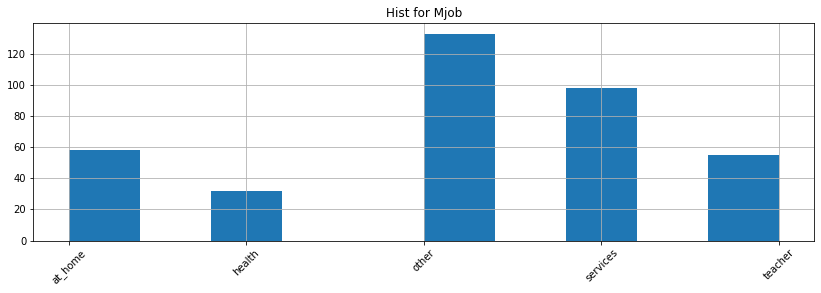

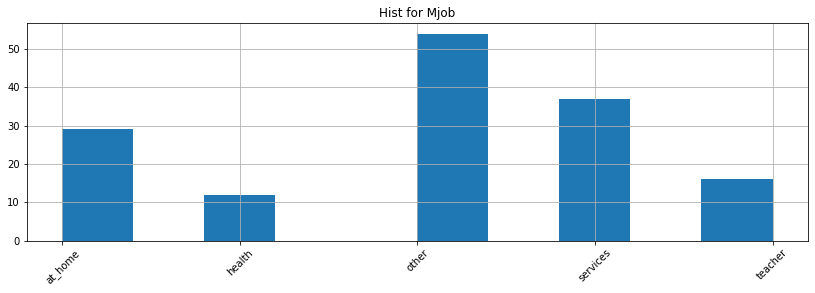

In [707]:
targetFeature = 'Mjob'
filterFields=['Medu',  'address', 'famsup', 'nursery','paid','schoolsup']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

In [708]:
updateFeatureAutho(targetFeature, filterFields)

NaN в "Mjob"  19 
filter = (Medu == 4.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 29
Выбрано 4 строк; Случаев 13;  Значение для Mjob=['teacher']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
40,health,4.0,1.0,1.0,1.0,1.0,0.0,6
93,other,4.0,1.0,1.0,1.0,1.0,0.0,3
130,services,4.0,1.0,1.0,1.0,1.0,0.0,4
146,teacher,4.0,1.0,1.0,1.0,1.0,0.0,13


-------------------------------------------------------
filter = (Medu == 3.0) & (address == 1.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 54
Выбрано 2 строк; Случаев 2;  Значение для Mjob=['services']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
78,other,3.0,1.0,0.0,1.0,1.0,0.0,1
118,services,3.0,1.0,0.0,1.0,1.0,0.0,2


-------------------------------------------------------
filter = (Medu == 4.0) & (address == 1.0) & (famsup == nan) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 59
filter = (Medu == 2.0) & (address == 1.0) & (famsup == 0.0) & (nursery == nan) & (paid == 1.0) & (schoolsup == 0.0); index = 88
filter = (Medu == 3.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == nan) & (schoolsup == 0.0); index = 104
filter = (Medu == 2.0) & (address == 0.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 128
Выбрано 2 строк; Случаев 2;  Значение для Mjob=['at_home']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
17,at_home,2.0,0.0,1.0,1.0,0.0,0.0,2
57,other,2.0,0.0,1.0,1.0,0.0,0.0,1


-------------------------------------------------------
filter = (Medu == 1.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 145
Выбрано 3 строк; Случаев 2;  Значение для Mjob=['services']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
12,at_home,1.0,1.0,1.0,1.0,1.0,0.0,1
54,other,1.0,1.0,1.0,1.0,1.0,0.0,1
97,services,1.0,1.0,1.0,1.0,1.0,0.0,2


-------------------------------------------------------
filter = (Medu == 1.0) & (address == 0.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 156
Выбрано 2 строк; Случаев 2;  Значение для Mjob=['at_home' 'other']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
2,at_home,1.0,0.0,0.0,1.0,0.0,0.0,2
42,other,1.0,0.0,0.0,1.0,0.0,0.0,2


-------------------------------------------------------
filter = (Medu == 2.0) & (address == 1.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 0.0) & (schoolsup == 0.0); index = 166
Выбрано 2 строк; Случаев 7;  Значение для Mjob=['other']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
60,other,2.0,1.0,0.0,1.0,0.0,0.0,7
104,services,2.0,1.0,0.0,1.0,0.0,0.0,1


-------------------------------------------------------
filter = (Medu == 3.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 174
Выбрано 5 строк; Случаев 7;  Значение для Mjob=['other']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
27,at_home,3.0,1.0,1.0,1.0,1.0,0.0,1
33,health,3.0,1.0,1.0,1.0,1.0,0.0,2
82,other,3.0,1.0,1.0,1.0,1.0,0.0,7
121,services,3.0,1.0,1.0,1.0,1.0,0.0,3
134,teacher,3.0,1.0,1.0,1.0,1.0,0.0,1


-------------------------------------------------------
filter = (Medu == 3.0) & (address == 1.0) & (famsup == 0.0) & (nursery == 0.0) & (paid == 0.0) & (schoolsup == 0.0); index = 177
Выбрано 2 строк; Случаев 2;  Значение для Mjob=['other' 'services']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
75,other,3.0,1.0,0.0,0.0,0.0,0.0,2
115,services,3.0,1.0,0.0,0.0,0.0,0.0,2


-------------------------------------------------------
filter = (Medu == 2.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 219
Выбрано 3 строк; Случаев 5;  Значение для Mjob=['services']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
21,at_home,2.0,1.0,1.0,1.0,1.0,0.0,3
67,other,2.0,1.0,1.0,1.0,1.0,0.0,3
109,services,2.0,1.0,1.0,1.0,1.0,0.0,5


-------------------------------------------------------
filter = (Medu == 4.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 0.0) & (paid == 0.0) & (schoolsup == 0.0); index = 224
Выбрано 3 строк; Случаев 1;  Значение для Mjob=['other' 'services' 'teacher']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
90,other,4.0,1.0,1.0,0.0,0.0,0.0,1
126,services,4.0,1.0,1.0,0.0,0.0,0.0,1
142,teacher,4.0,1.0,1.0,0.0,0.0,0.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 260
Выбрано 4 строк; Случаев 14;  Значение для Mjob=['teacher']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
40,health,4.0,1.0,1.0,1.0,1.0,0.0,6
93,other,4.0,1.0,1.0,1.0,1.0,0.0,3
130,services,4.0,1.0,1.0,1.0,1.0,0.0,4
146,teacher,4.0,1.0,1.0,1.0,1.0,0.0,14


-------------------------------------------------------
filter = (Medu == 3.0) & (address == 0.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 265
Выбрано 3 строк; Случаев 2;  Значение для Mjob=['services']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
74,other,3.0,0.0,1.0,1.0,1.0,0.0,1
114,services,3.0,0.0,1.0,1.0,1.0,0.0,2
132,teacher,3.0,0.0,1.0,1.0,1.0,0.0,1


-------------------------------------------------------
filter = (Medu == 4.0) & (address == 1.0) & (famsup == nan) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 268
filter = (Medu == 4.0) & (address == 1.0) & (famsup == 0.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 277
Выбрано 3 строк; Случаев 3;  Значение для Mjob=['teacher']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
89,other,4.0,1.0,0.0,1.0,1.0,0.0,2
125,services,4.0,1.0,0.0,1.0,1.0,0.0,2
141,teacher,4.0,1.0,0.0,1.0,1.0,0.0,3


-------------------------------------------------------
filter = (Medu == 4.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 291
Выбрано 4 строк; Случаев 15;  Значение для Mjob=['teacher']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
40,health,4.0,1.0,1.0,1.0,1.0,0.0,6
93,other,4.0,1.0,1.0,1.0,1.0,0.0,3
130,services,4.0,1.0,1.0,1.0,1.0,0.0,4
146,teacher,4.0,1.0,1.0,1.0,1.0,0.0,15


-------------------------------------------------------
filter = (Medu == 3.0) & (address == 1.0) & (famsup == 1.0) & (nursery == 1.0) & (paid == 1.0) & (schoolsup == 0.0); index = 337
Выбрано 5 строк; Случаев 8;  Значение для Mjob=['other']


,Mjob,Medu,address,famsup,nursery,paid,schoolsup,count
27,at_home,3.0,1.0,1.0,1.0,1.0,0.0,1
33,health,3.0,1.0,1.0,1.0,1.0,0.0,2
82,other,3.0,1.0,1.0,1.0,1.0,0.0,8
121,services,3.0,1.0,1.0,1.0,1.0,0.0,3
134,teacher,3.0,1.0,1.0,1.0,1.0,0.0,1


-------------------------------------------------------
НЕ Все NaN в "Mjob" успешно заменены, осталось 4 из 395
Все NaN в "Mjob" успешно заменены.


--------------------------------------------
# Устраняем NaN в Fjob

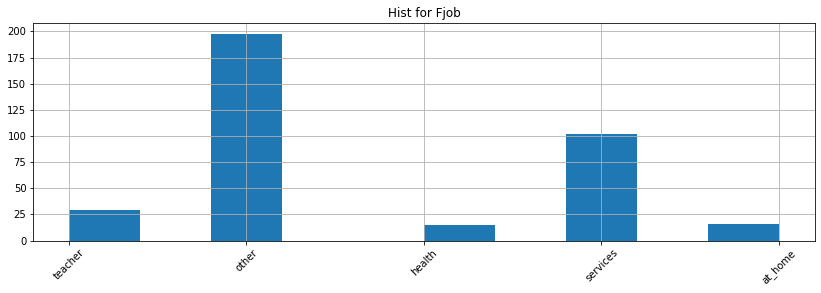

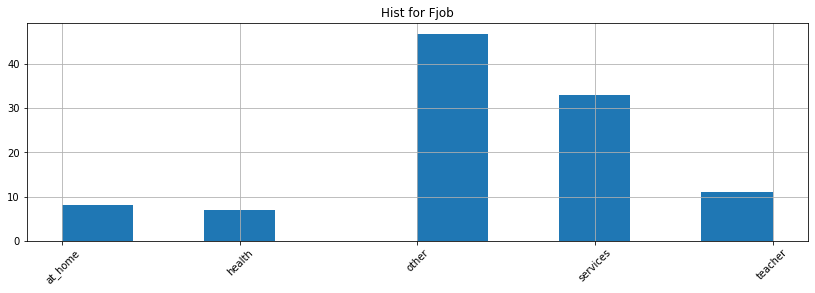

In [717]:
targetFeature = 'Fjob'
filterFields=['Fedu',  'address', 'famsup', 'nursery','paid']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

In [740]:
updateFeatureAutho(targetFeature, filterFields)

NaN в "famsize"  0 
Все NaN в "famsize" успешно заменены.


-------------------------------------------------------
# Устраняем NaN в reason

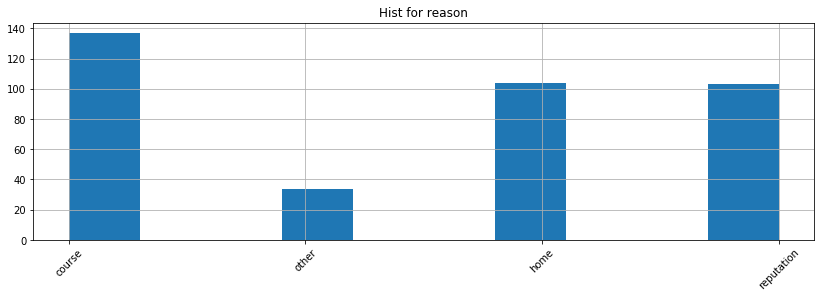

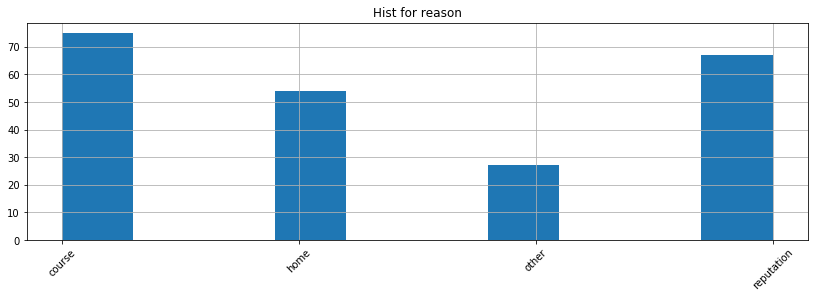

In [743]:
targetFeature = 'reason'
filterFields=['school','address','Fedu','Medu','health']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

NaN в "reason"  0 
Все NaN в "reason" успешно заменены.
----------------------- Проверка распределения reason после устранения NaN


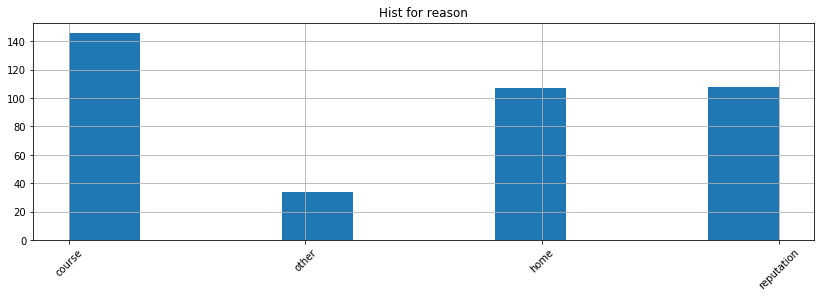

In [746]:
updateFeatureAutho(targetFeature, filterFields)

------------------------------------------------------
# Устраняем NaN в guardian

Распределение признаков похоже на исходное Распределение -- использем его для восстановления пропущенных признаков 

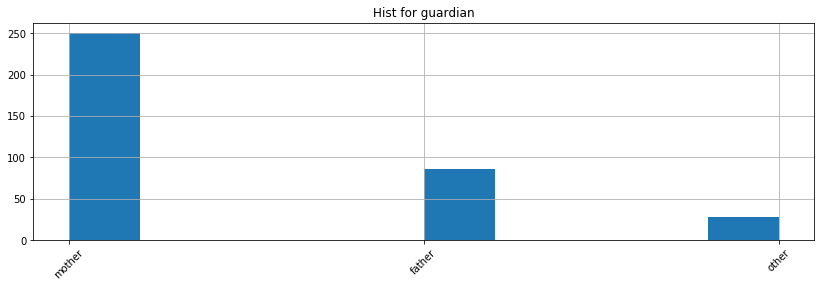

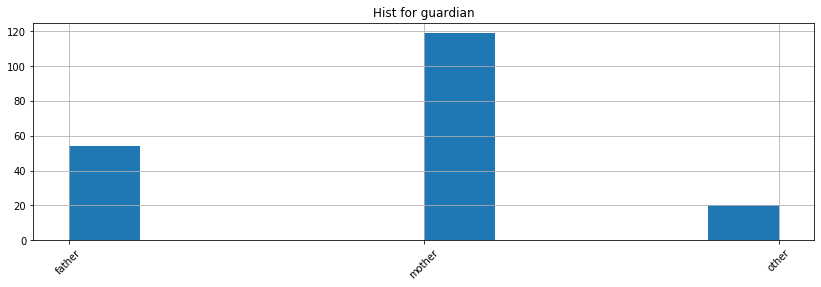

In [748]:
targetFeature = 'guardian'
filterFields=['Pstatus', 'famrel','Fjob','Mjob','address','famsup']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

NaN в "guardian"  31 
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "health") & (Mjob == "services") & (address == 0.0) & (famsup == nan); index = 38
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "teacher") & (address == 1.0) & (famsup == 1.0); index = 41
Выбрано 1 строк; Случаев 1;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
160,mother,1.0,5.0,other,teacher,1.0,1.0,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "teacher") & (Mjob == "services") & (address == 1.0) & (famsup == 1.0); index = 49
Выбрано 2 строк; Случаев 3;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
40,father,1.0,4.0,teacher,services,1.0,1.0,2
145,mother,1.0,4.0,teacher,services,1.0,1.0,3


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (Fjob == "services") & (Mjob == "services") & (address == 1.0) & (famsup == 1.0); index = 53
Выбрано 1 строк; Случаев 2;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
103,mother,1.0,3.0,services,services,1.0,1.0,2


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 2.0) & (Fjob == "teacher") & (Mjob == "health") & (address == 0.0) & (famsup == 1.0); index = 60
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "other") & (address == 1.0) & (famsup == 0.0); index = 81
Выбрано 2 строк; Случаев 4;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
45,father,1.0,5.0,other,other,1.0,0.0,1
154,mother,1.0,5.0,other,other,1.0,0.0,4


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "other") & (Mjob == "other") & (address == 1.0) & (famsup == 1.0); index = 90
Выбрано 3 строк; Случаев 8;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
27,father,1.0,4.0,other,other,1.0,1.0,4
122,mother,1.0,4.0,other,other,1.0,1.0,8
185,other,1.0,4.0,other,other,1.0,1.0,4


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "other") & (address == 1.0) & (famsup == nan); index = 98
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "other") & (Mjob == "services") & (address == 1.0) & (famsup == 0.0); index = 138
Выбрано 1 строк; Случаев 3;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
125,mother,1.0,4.0,other,services,1.0,0.0,3


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "other") & (address == 1.0) & (famsup == 1.0); index = 144
Выбрано 1 строк; Случаев 8;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
155,mother,1.0,5.0,other,other,1.0,1.0,8


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "services") & (Mjob == "other") & (address == 0.0) & (famsup == 0.0); index = 164
Выбрано 1 строк; Случаев 1;  Значение для guardian=['other']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
193,other,1.0,5.0,services,other,0.0,0.0,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "services") & (Mjob == "at_home") & (address == 1.0) & (famsup == 0.0); index = 173
Выбрано 2 строк; Случаев 1;  Значение для guardian=['mother' 'other']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
132,mother,1.0,4.0,services,at_home,1.0,0.0,1
187,other,1.0,4.0,services,at_home,1.0,0.0,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "other") & (Mjob == "services") & (address == 1.0) & (famsup == 0.0); index = 181
Выбрано 1 строк; Случаев 4;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
125,mother,1.0,4.0,other,services,1.0,0.0,4


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (Fjob == "other") & (Mjob == "other") & (address == 1.0) & (famsup == 1.0); index = 223
Выбрано 1 строк; Случаев 3;  Значение для guardian=['father']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
14,father,1.0,3.0,other,other,1.0,1.0,3


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "at_home") & (address == 1.0) & (famsup == 0.0); index = 235
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 2.0) & (Fjob == "other") & (Mjob == "health") & (address == 1.0) & (famsup == 0.0); index = 240
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "other") & (address == 1.0) & (famsup == 0.0); index = 258
Выбрано 2 строк; Случаев 5;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
45,father,1.0,5.0,other,other,1.0,0.0,1
156,mother,1.0,5.0,other,other,1.0,0.0,5


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "services") & (Mjob == "teacher") & (address == 1.0) & (famsup == nan); index = 279
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "services") & (Mjob == "teacher") & (address == 1.0) & (famsup == 1.0); index = 291
Выбрано 2 строк; Случаев 3;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
145,mother,1.0,4.0,services,teacher,1.0,1.0,3
193,other,1.0,4.0,services,teacher,1.0,1.0,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "services") & (Mjob == "at_home") & (address == 0.0) & (famsup == 1.0); index = 318
Выбрано 2 строк; Случаев 1;  Значение для guardian=['father' 'mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
30,father,1.0,4.0,services,at_home,0.0,1.0,1
132,mother,1.0,4.0,services,at_home,0.0,1.0,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "other") & (Mjob == "at_home") & (address == 0.0) & (famsup == 1.0); index = 331
Выбрано 1 строк; Случаев 2;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
115,mother,1.0,4.0,other,at_home,0.0,1.0,2


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "other") & (Mjob == "at_home") & (address == 1.0) & (famsup == 1.0); index = 344
Выбрано 1 строк; Случаев 6;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
117,mother,1.0,4.0,other,at_home,1.0,1.0,6


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == nan) & (Fjob == "other") & (Mjob == "teacher") & (address == 1.0) & (famsup == 1.0); index = 347
filter = (Pstatus == 1.0) & (famrel == nan) & (Fjob == "other") & (Mjob == "other") & (address == 0.0) & (famsup == 1.0); index = 349
filter = (Pstatus == 1.0) & (famrel == 4.0) & (Fjob == "services") & (Mjob == "services") & (address == 1.0) & (famsup == 1.0); index = 362
Выбрано 2 строк; Случаев 4;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
35,father,1.0,4.0,services,services,1.0,1.0,1
142,mother,1.0,4.0,services,services,1.0,1.0,4


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (Fjob == "services") & (Mjob == "other") & (address == 0.0) & (famsup == 0.0); index = 364
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 3.0) & (Fjob == "other") & (Mjob == "at_home") & (address == 0.0) & (famsup == 1.0); index = 365
Выбрано 1 строк; Случаев 2;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
94,mother,1.0,3.0,other,at_home,0.0,1.0,2


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "health") & (address == 1.0) & (famsup == 1.0); index = 376
Выбрано 1 строк; Случаев 1;  Значение для guardian=['father']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
43,father,1.0,5.0,other,health,1.0,1.0,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "at_home") & (address == 0.0) & (famsup == 0.0); index = 385
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count


-------------------------------------------------------
filter = (Pstatus == 0.0) & (famrel == 5.0) & (Fjob == "services") & (Mjob == "services") & (address == 1.0) & (famsup == 1.0); index = 390
Выбрано 1 строк; Случаев 1;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
72,mother,0.0,5.0,services,services,1.0,1.0,1


-------------------------------------------------------
filter = (Pstatus == 1.0) & (famrel == 5.0) & (Fjob == "other") & (Mjob == "other") & (address == 0.0) & (famsup == 0.0); index = 392
Выбрано 2 строк; Случаев 3;  Значение для guardian=['mother']


,guardian,Pstatus,famrel,Fjob,Mjob,address,famsup,count
44,father,1.0,5.0,other,other,0.0,0.0,1
156,mother,1.0,5.0,other,other,0.0,0.0,3


-------------------------------------------------------
НЕ Все NaN в "guardian" успешно заменены, осталось 5 из 395
Все NaN в "guardian" успешно заменены.
----------------------- Проверка распределения guardian после устранения NaN


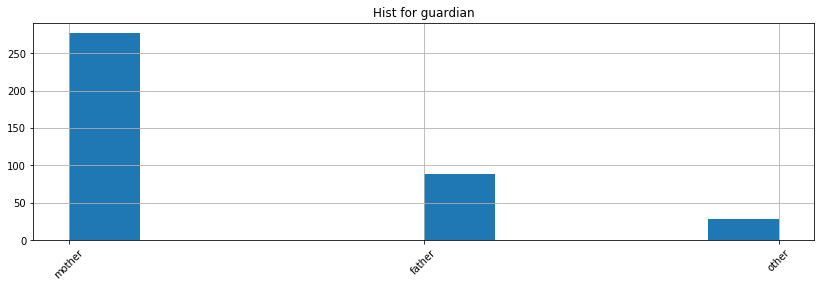

In [749]:
updateFeatureAutho(targetFeature, filterFields)

-------------------------------------------------
# Устраняем NaN в traveltime

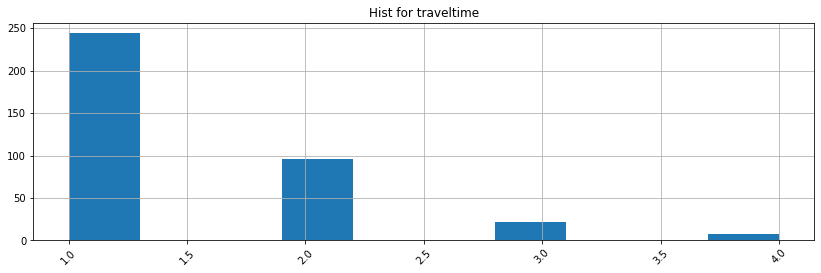

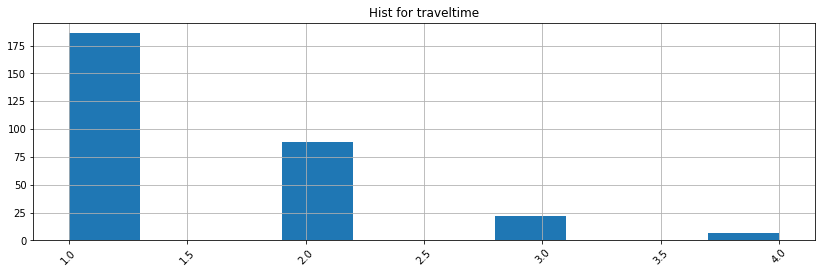

In [761]:
targetFeature = 'traveltime'
filterFields=['address','school','Mjob','Fjob','reason','Medu','Fedu',]

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

NaN в "traveltime"  26 
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "home") & (Medu == 2.0) & (Fedu == 2.0); index = 26
Выбрано 2 строк; Случаев 7;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
91,1.0,1.0,1,other,other,home,2.0,2.0,7
242,2.0,1.0,1,other,other,home,2.0,2.0,2


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "health") & (Fjob == "services") & (reason == "home") & (Medu == 4.0) & (Fedu == 4.0); index = 30
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "other") & (Medu == 2.0) & (Fedu == 3.0); index = 35
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 0.0) & (school == 1) & (Mjob == "other") & (Fjob == "teacher") & (reason == "reputation") & (Medu == 4.0) & (Fedu == 4.0); index = 37
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "course") & (Medu == 4.0) & (Fedu == 2.0); index = 59
Выбрано 1 строк; Случаев 1;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
88,1.0,1.0,1,other,other,course,4.0,2.0,1


-------------------------------------------------------
filter = (address == 0.0) & (school == 1) & (Mjob == "health") & (Fjob == "other") & (reason == "reputation") & (Medu == 2.0) & (Fedu == 2.0); index = 68
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "reputation") & (Medu == 3.0) & (Fedu == 1.0); index = 70
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "course") & (Medu == 3.0) & (Fedu == 4.0); index = 104
Выбрано 1 строк; Случаев 1;  Значение для traveltime=[3.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
296,3.0,1.0,1,other,other,course,3.0,4.0,1


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "at_home") & (Fjob == "other") & (reason == "course") & (Medu == 2.0) & (Fedu == 2.0); index = 112
Выбрано 1 строк; Случаев 1;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
53,1.0,1.0,1,at_home,other,course,2.0,2.0,1


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "course") & (Medu == 2.0) & (Fedu == 2.0); index = 132
Выбрано 2 строк; Случаев 5;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
87,1.0,1.0,1,other,other,course,2.0,2.0,5
243,2.0,1.0,1,other,other,course,2.0,2.0,1


-------------------------------------------------------
filter = (address == 0.0) & (school == 1) & (Mjob == "at_home") & (Fjob == "teacher") & (reason == "course") & (Medu == 3.0) & (Fedu == 4.0); index = 134
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "home") & (Medu == 3.0) & (Fedu == 3.0); index = 137
Выбрано 1 строк; Случаев 3;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
98,1.0,1.0,1,other,other,home,3.0,3.0,3


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "teacher") & (Fjob == "services") & (reason == "course") & (Medu == 4.0) & (Fedu == 3.0); index = 142
Выбрано 2 строк; Случаев 2;  Значение для traveltime=[2.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
275,2.0,1.0,1,teacher,services,course,4.0,3.0,2
301,3.0,1.0,1,teacher,services,course,4.0,3.0,1


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "at_home") & (Fjob == "other") & (reason == "course") & (Medu == 1.0) & (Fedu == 2.0); index = 147
Выбрано 1 строк; Случаев 1;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
52,1.0,1.0,1,at_home,other,course,1.0,2.0,1


-------------------------------------------------------
filter = (address == 0.0) & (school == 1) & (Mjob == "at_home") & (Fjob == "other") & (reason == "course") & (Medu == 1.0) & (Fedu == 1.0); index = 157
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 0.0) & (school == 1) & (Mjob == "at_home") & (Fjob == "other") & (reason == "course") & (Medu == 2.0) & (Fedu == 1.0); index = 160
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "services") & (Fjob == "teacher") & (reason == "reputation") & (Medu == 2.0) & (Fedu == 4.0); index = 182
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "course") & (Medu == 3.0) & (Fedu == 2.0); index = 226
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "home") & (Medu == 1.0) & (Fedu == 1.0); index = 234
Выбрано 2 строк; Случаев 2;  Значение для traveltime=[2.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
96,1.0,1.0,1,other,other,home,1.0,1.0,1
250,2.0,1.0,1,other,other,home,1.0,1.0,2


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "teacher") & (Fjob == "other") & (reason == "course") & (Medu == 4.0) & (Fedu == 3.0); index = 261
Выбрано 2 строк; Случаев 2;  Значение для traveltime=[1. 2.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
179,1.0,1.0,1,teacher,other,course,4.0,3.0,2
278,2.0,1.0,1,teacher,other,course,4.0,3.0,2


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "other") & (Fjob == "other") & (reason == "reputation") & (Medu == 4.0) & (Fedu == 2.0); index = 268
Выбрано 2 строк; Случаев 1;  Значение для traveltime=[1. 2.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
114,1.0,1.0,1,other,other,reputation,4.0,2.0,1
259,2.0,1.0,1,other,other,reputation,4.0,2.0,1


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "services") & (Fjob == "services") & (reason == "home") & (Medu == 1.0) & (Fedu == 1.0); index = 310
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 1) & (Mjob == "health") & (Fjob == "other") & (reason == "reputation") & (Medu == 4.0) & (Fedu == 3.0); index = 348
Выбрано 1 строк; Случаев 1;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count
77,1.0,1.0,1,health,other,reputation,4.0,3.0,1


-------------------------------------------------------
filter = (address == 0.0) & (school == 0) & (Mjob == "other") & (Fjob == "other") & (reason == "home") & (Medu == 4.0) & (Fedu == 2.0); index = 384
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 0.0) & (school == 0) & (Mjob == "at_home") & (Fjob == "other") & (reason == "other") & (Medu == 2.0) & (Fedu == 2.0); index = 385
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
filter = (address == 1.0) & (school == 0) & (Mjob == "other") & (Fjob == "other") & (reason == "course") & (Medu == 1.0) & (Fedu == 1.0); index = 389
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для traveltime=[1.]


,traveltime,address,school,Mjob,Fjob,reason,Medu,Fedu,count


-------------------------------------------------------
Все NaN в "traveltime" успешно заменены.
----------------------- Проверка распределения traveltime после устранения NaN


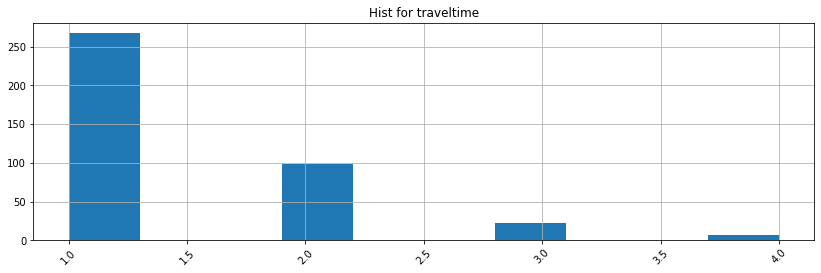

In [762]:
updateFeatureAutho(targetFeature, filterFields)

-------------------------------------------------
# Устраняем NaN в studytime

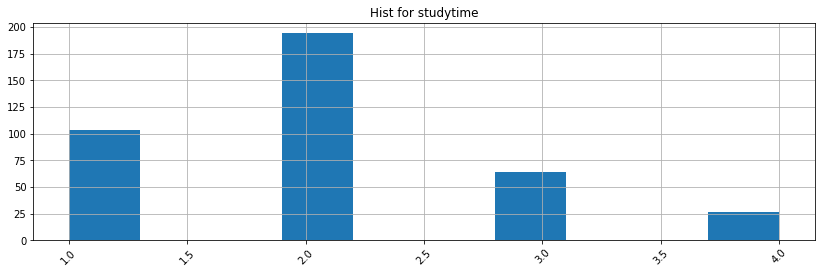

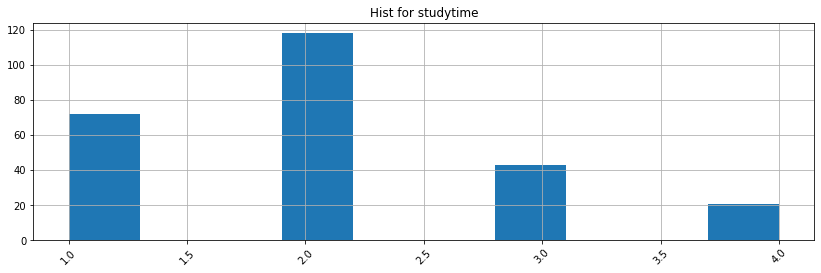

In [775]:
targetFeature = 'studytime'
filterFields=['Medu','Fedu', 'activities', 'traveltime', 'higher', 'goout']

get_his4Val(targetFeature)

gb = filterFields.copy()
gb.insert(0,targetFeature)

#display(df.groupby(gb)['age'].count().reset_index()[targetFeature].value_counts())
get_his4ValDf(targetFeature, df.groupby(gb)['age'].count().reset_index()[targetFeature])

NaN в "studytime"  7 
filter = (Medu == 3.0) & (Fedu == 3.0) & (activities == 1.0) & (traveltime == 3.0) & (higher == 1.0) & (goout == 2.0); index = 17
Ничего не нашли похожего
Выбрано 0 строк; Случаев 0;  Значение для studytime=[2.]


,studytime,Medu,Fedu,activities,traveltime,higher,goout,count


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 3.0) & (activities == 1.0) & (traveltime == 1.0) & (higher == 1.0) & (goout == 5.0); index = 91
Выбрано 1 строк; Случаев 1;  Значение для studytime=[1.]


,studytime,Medu,Fedu,activities,traveltime,higher,goout,count
55,1.0,4.0,3.0,1.0,1.0,1.0,5.0,1


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 2.0) & (activities == 1.0) & (traveltime == 1.0) & (higher == 1.0) & (goout == 2.0); index = 112
Выбрано 1 строк; Случаев 2;  Значение для studytime=[2.]


,studytime,Medu,Fedu,activities,traveltime,higher,goout,count
115,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2


-------------------------------------------------------
filter = (Medu == 4.0) & (Fedu == 4.0) & (activities == 1.0) & (traveltime == 1.0) & (higher == 1.0) & (goout == 5.0); index = 129
Выбрано 3 строк; Случаев 1;  Значение для studytime=[1. 2. 3.]


,studytime,Medu,Fedu,activities,traveltime,higher,goout,count
68,1.0,4.0,4.0,1.0,1.0,1.0,5.0,1
187,2.0,4.0,4.0,1.0,1.0,1.0,5.0,1
233,3.0,4.0,4.0,1.0,1.0,1.0,5.0,1


-------------------------------------------------------
filter = (Medu == 2.0) & (Fedu == 3.0) & (activities == 0.0) & (traveltime == 1.0) & (higher == nan) & (goout == 3.0); index = 227
filter = (Medu == 3.0) & (Fedu == 1.0) & (activities == 1.0) & (traveltime == 1.0) & (higher == 1.0) & (goout == 4.0); index = 266
Выбрано 1 строк; Случаев 1;  Значение для studytime=[2.]


,studytime,Medu,Fedu,activities,traveltime,higher,goout,count
133,2.0,3.0,1.0,1.0,1.0,1.0,4.0,1


-------------------------------------------------------
filter = (Medu == 1.0) & (Fedu == 1.0) & (activities == 0.0) & (traveltime == 1.0) & (higher == 1.0) & (goout == 2.0); index = 314
Выбрано 1 строк; Случаев 2;  Значение для studytime=[2.]


,studytime,Medu,Fedu,activities,traveltime,higher,goout,count
73,2.0,1.0,1.0,0.0,1.0,1.0,2.0,2


-------------------------------------------------------
НЕ Все NaN в "studytime" успешно заменены, осталось 1 из 395
Все NaN в "studytime" успешно заменены.
----------------------- Проверка распределения studytime после устранения NaN


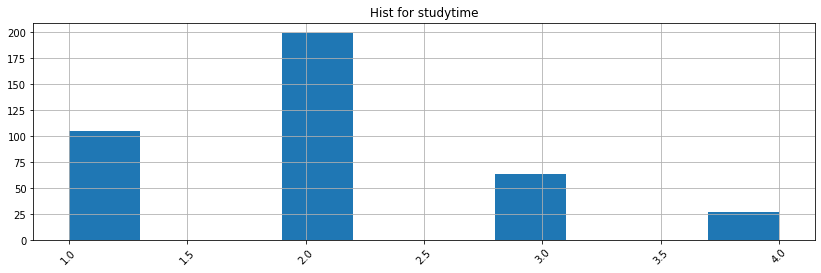

In [776]:
updateFeatureAutho(targetFeature, filterFields)

------------------------------------------------------------


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null int64
sex                    395 non-null int64
age                    395 non-null int64
address                395 non-null float64
famsize                395 non-null float64
Pstatus                395 non-null float64
Medu                   395 non-null float64
Fedu                   395 non-null float64
Mjob                   395 non-null object
Fjob                   395 non-null object
reason                 395 non-null object
guardian               395 non-null object
traveltime             395 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null float64
famsup                 357 non-null float64
paid                   355 non-null float64
activities             381 non-null float64
nursery                380 non-null float64
studytime, granular    38

In [1053]:
df[(pd.isna(df.reason)) ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,FamEdu


In [1054]:
# Образование, работа матери + образование отца для выяснениия возможной работы отца
df[df.Medu==4].groupby(['Medu','Mjob','Fedu','Fjob'])['age'].count()

Medu  Mjob      Fedu  Fjob    
4.0   at_home   4.0   teacher      2
      health    2.0   other        5
                      services     2
                3.0   other        6
                4.0   health       3
                      other        6
                      services     2
                      teacher      1
      other     2.0   other        5
                3.0   at_home      1
                      other        6
                4.0   other        3
                      services     1
                      teacher      7
      services  3.0   at_home      1
                      other        4
                      services     4
                4.0   other        4
                      services     7
                      teacher      5
      teacher   0.0   other        1
                2.0   other        2
                      services     4
                3.0   at_home      1
                      health       1
                      other       10
       

In [1055]:
df[(pd.isna(df.Fjob)) & (df.Medu ==4 )]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,FamEdu


In [1056]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school                 395 non-null int64
sex                    395 non-null int64
age                    395 non-null int64
address                395 non-null float64
famsize                395 non-null float64
Pstatus                395 non-null float64
Medu                   395 non-null float64
Fedu                   395 non-null float64
Mjob                   395 non-null object
Fjob                   395 non-null object
reason                 395 non-null object
guardian               395 non-null object
traveltime             395 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null float64
famsup                 357 non-null float64
paid                   355 non-null float64
activities             381 non-null float64
nursery                380 non-null float64
studytime, granular    38

In [1057]:
df0=pd.get_dummies(df[['Pstatus','absences', 'FamEdu','guardian', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'score']])

df0['guardian_father'].fillna( method ='bfill', inplace = True) 
df0[['guardian_father', 'guardian_mother', 'guardian_other']].fillna( method ='bfill', inplace = True) 
df0

,Pstatus,absences,FamEdu,romantic,famrel,freetime,goout,health,score,guardian_father,guardian_mother,guardian_other
0,0.0,6.0,4.0,0.0,4.0,3.0,4.0,3.0,30.0,0,1,0
1,1.0,4.0,1.0,0.0,5.0,3.0,3.0,3.0,30.0,1,0,0
2,1.0,10.0,1.0,NaN,4.0,3.0,2.0,3.0,50.0,0,1,0
3,1.0,2.0,4.0,1.0,3.0,2.0,2.0,5.0,75.0,0,1,0
4,1.0,4.0,3.0,0.0,4.0,3.0,2.0,5.0,50.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,4.0,2.0,0.0,5.0,5.0,4.0,4.0,45.0,0,1,0
391,1.0,3.0,3.0,0.0,2.0,4.0,5.0,2.0,80.0,0,1,0
392,1.0,3.0,1.0,0.0,5.0,5.0,3.0,3.0,35.0,0,1,0
393,1.0,0.0,3.0,0.0,4.0,4.0,1.0,5.0,50.0,0,1,0


In [1058]:
rr=abs(df0.corr()['Pstatus'])
rr[rr>0.1]

Pstatus            1.000000
absences           0.122396
FamEdu             0.133679
guardian_father    0.103324
Name: Pstatus, dtype: float64

In [1059]:
getCorrelationFeatures(col='guardian_other', df1=df0)

guardian_other     1.00
guardian_mother   -0.42
guardian_father   -0.16
romantic           0.13
FamEdu            -0.12
Name: guardian_other, dtype: float64

In [1060]:
#sns.pairplot(df, kind = 'reg')

In [1061]:
#df.loc[(pd.isna(df.famsize)) & ( df.Pstatus == 'T')  ,'famsize'] ='GT3'
#df.loc[(pd.isna(df.famsize)) & ( df.Pstatus == 'T')]


In [1062]:
# df1=pd.get_dummies(df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
#        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
#        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
#        'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
#        'freetime', 'goout', 'health', 'absences', 'score']])
# df1

In [1063]:
# # df.Fjob.fillna(method='backfill', axis=0, inplace=True)
# df.fillna(method='backfill', axis=0, inplace=True)
# for col in [	'Fjob',	'reason',	'guardian',	'traveltime',	'studytime',	'failures',	'schoolsup',	'famsup',	'paid',	'activities',	'nursery',	'higher',	'internet',	'romantic',	'famrel', 'freetime',	'goout',	'health','Mjob',	'absences']:
#     get_stat_dif(col)

In [1064]:
# changeVal(['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher','internet',	'romantic'],'yes',1,'no',0)
# changeVal(['famsize'],'LE3',0,'GT3',1)
# changeVal(['Pstatus'],'T',1,'A',0)
# changeVal(['address'],'U',1,'R',0)

In [1065]:
# for col in df.columns: # ['school',	'sex',	'age',	'address',	'famsize',	'Pstatus',	'Medu',	'Fedu',	'Mjob',	'Fjob',	'reason',	'guardian',	'traveltime',	'studytime',	'failures',	'schoolsup',	'famsup',	'paid',	'activities',	'nursery',	'higher',	'internet',	'romantic',	'famrel', 'freetime',	'goout',	'health',	'absences']:
#      get_boxplot(col)	
    	

In [1066]:
#df.loc[pd.isna(df.address)]

In [1067]:
for col in [	'Fjob',	'reason',	'guardian',	'traveltime',	'studytime',	'failures',	'schoolsup',	'famsup',	'paid',	'activities',	'nursery',	'higher',	'internet',	'romantic',	'famrel', 'freetime',	'goout',	'health','Mjob',	'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [1068]:
df.Mjob.value_counts()


other       143
services     99
at_home      60
teacher      60
health       33
Name: Mjob, dtype: int64